# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [16]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

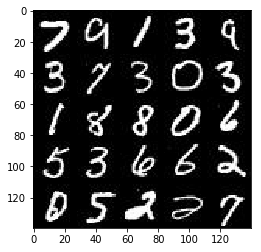

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

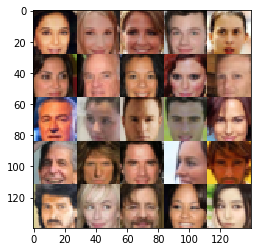

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [20]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], "input_real")
    input_z = tf.placeholder(tf.float32, [None, z_dim], "input_z")
    learning_rate = tf.placeholder(tf.float32, None, "learning_rate")

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [21]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [22]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
        
        h4 = tf.layers.conv2d_transpose(h3, 64, 5, 1, 'same')
        h4 = tf.layers.batch_normalization(h4, training=is_train)
        h4 = tf.maximum(alpha * h4, h4)
    
        logits = tf.layers.conv2d_transpose(h4, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [23]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [24]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(update_ops):
        t_vars = tf.trainable_variables()
        
        d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
        g_vars = [var for var in t_vars if var.name.startswith('generator')]

        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [26]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 0.7505... Generator Loss: 1.2688
Epoch 1/2... Batch 20... Discriminator Loss: 0.4413... Generator Loss: 2.7567
Epoch 1/2... Batch 30... Discriminator Loss: 0.4282... Generator Loss: 5.3384
Epoch 1/2... Batch 40... Discriminator Loss: 4.0415... Generator Loss: 0.0300
Epoch 1/2... Batch 50... Discriminator Loss: 0.8429... Generator Loss: 4.1427
Epoch 1/2... Batch 60... Discriminator Loss: 0.9482... Generator Loss: 3.3324
Epoch 1/2... Batch 70... Discriminator Loss: 0.7251... Generator Loss: 4.5799
Epoch 1/2... Batch 80... Discriminator Loss: 0.7111... Generator Loss: 7.7268
Epoch 1/2... Batch 90... Discriminator Loss: 0.7433... Generator Loss: 1.9877
Epoch 1/2... Batch 100... Discriminator Loss: 0.4674... Generator Loss: 4.1991


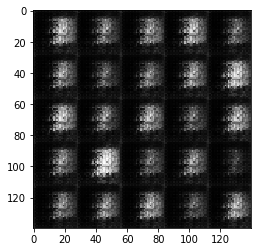

Epoch 1/2... Batch 110... Discriminator Loss: 0.6360... Generator Loss: 2.6677
Epoch 1/2... Batch 120... Discriminator Loss: 0.5773... Generator Loss: 5.4253
Epoch 1/2... Batch 130... Discriminator Loss: 0.5451... Generator Loss: 2.3956
Epoch 1/2... Batch 140... Discriminator Loss: 0.5469... Generator Loss: 2.4308
Epoch 1/2... Batch 150... Discriminator Loss: 0.4486... Generator Loss: 2.7370
Epoch 1/2... Batch 160... Discriminator Loss: 0.5529... Generator Loss: 3.2417
Epoch 1/2... Batch 170... Discriminator Loss: 0.4196... Generator Loss: 4.1482
Epoch 1/2... Batch 180... Discriminator Loss: 0.4128... Generator Loss: 3.2963
Epoch 1/2... Batch 190... Discriminator Loss: 0.5428... Generator Loss: 2.5171
Epoch 1/2... Batch 200... Discriminator Loss: 1.0104... Generator Loss: 0.8547


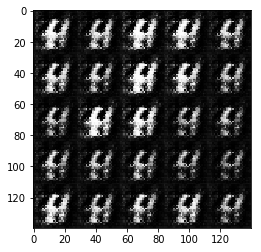

Epoch 1/2... Batch 210... Discriminator Loss: 0.4446... Generator Loss: 4.7025
Epoch 1/2... Batch 220... Discriminator Loss: 0.6588... Generator Loss: 1.8037
Epoch 1/2... Batch 230... Discriminator Loss: 0.4581... Generator Loss: 2.8696
Epoch 1/2... Batch 240... Discriminator Loss: 0.4065... Generator Loss: 3.2426
Epoch 1/2... Batch 250... Discriminator Loss: 0.4370... Generator Loss: 3.4590
Epoch 1/2... Batch 260... Discriminator Loss: 0.4873... Generator Loss: 2.7260
Epoch 1/2... Batch 270... Discriminator Loss: 0.4314... Generator Loss: 2.9823
Epoch 1/2... Batch 280... Discriminator Loss: 0.4101... Generator Loss: 3.5872
Epoch 1/2... Batch 290... Discriminator Loss: 0.5026... Generator Loss: 2.2860
Epoch 1/2... Batch 300... Discriminator Loss: 0.5297... Generator Loss: 2.6560


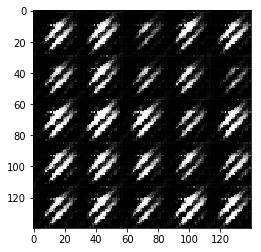

Epoch 1/2... Batch 310... Discriminator Loss: 0.5031... Generator Loss: 2.4894
Epoch 1/2... Batch 320... Discriminator Loss: 0.4191... Generator Loss: 3.3878
Epoch 1/2... Batch 330... Discriminator Loss: 0.4364... Generator Loss: 5.0682
Epoch 1/2... Batch 340... Discriminator Loss: 0.4203... Generator Loss: 3.3449
Epoch 1/2... Batch 350... Discriminator Loss: 0.3973... Generator Loss: 3.5401
Epoch 1/2... Batch 360... Discriminator Loss: 0.4595... Generator Loss: 3.1056
Epoch 1/2... Batch 370... Discriminator Loss: 0.4008... Generator Loss: 4.3211
Epoch 1/2... Batch 380... Discriminator Loss: 0.5030... Generator Loss: 2.7913
Epoch 1/2... Batch 390... Discriminator Loss: 0.4201... Generator Loss: 3.4328
Epoch 1/2... Batch 400... Discriminator Loss: 0.4481... Generator Loss: 2.8968


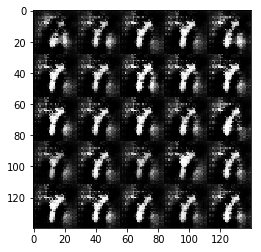

Epoch 1/2... Batch 410... Discriminator Loss: 0.4890... Generator Loss: 2.3811
Epoch 1/2... Batch 420... Discriminator Loss: 0.6582... Generator Loss: 3.7380
Epoch 1/2... Batch 430... Discriminator Loss: 0.4444... Generator Loss: 3.1248
Epoch 1/2... Batch 440... Discriminator Loss: 0.6833... Generator Loss: 1.6266
Epoch 1/2... Batch 450... Discriminator Loss: 0.7105... Generator Loss: 4.6002
Epoch 1/2... Batch 460... Discriminator Loss: 0.4978... Generator Loss: 2.6257
Epoch 1/2... Batch 470... Discriminator Loss: 0.5689... Generator Loss: 2.3056
Epoch 1/2... Batch 480... Discriminator Loss: 0.5362... Generator Loss: 2.7955
Epoch 1/2... Batch 490... Discriminator Loss: 0.4287... Generator Loss: 3.2232
Epoch 1/2... Batch 500... Discriminator Loss: 0.5926... Generator Loss: 6.0497


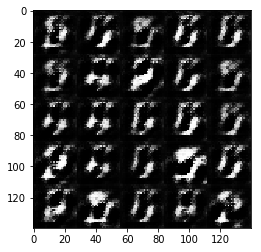

Epoch 1/2... Batch 510... Discriminator Loss: 0.5191... Generator Loss: 3.1005
Epoch 1/2... Batch 520... Discriminator Loss: 0.5630... Generator Loss: 2.4463
Epoch 1/2... Batch 530... Discriminator Loss: 0.5509... Generator Loss: 3.1846
Epoch 1/2... Batch 540... Discriminator Loss: 0.4689... Generator Loss: 2.7955
Epoch 1/2... Batch 550... Discriminator Loss: 0.4484... Generator Loss: 2.8593
Epoch 1/2... Batch 560... Discriminator Loss: 0.4400... Generator Loss: 3.2528
Epoch 1/2... Batch 570... Discriminator Loss: 0.4197... Generator Loss: 3.9591
Epoch 1/2... Batch 580... Discriminator Loss: 0.4533... Generator Loss: 3.1588
Epoch 1/2... Batch 590... Discriminator Loss: 0.4845... Generator Loss: 2.8100
Epoch 1/2... Batch 600... Discriminator Loss: 0.6001... Generator Loss: 2.2878


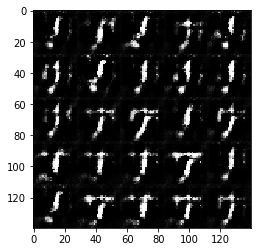

Epoch 1/2... Batch 610... Discriminator Loss: 0.4265... Generator Loss: 3.0722
Epoch 1/2... Batch 620... Discriminator Loss: 0.9202... Generator Loss: 7.6476
Epoch 1/2... Batch 630... Discriminator Loss: 0.5159... Generator Loss: 2.7732
Epoch 1/2... Batch 640... Discriminator Loss: 0.5518... Generator Loss: 2.4633
Epoch 1/2... Batch 650... Discriminator Loss: 0.4220... Generator Loss: 3.6925
Epoch 1/2... Batch 660... Discriminator Loss: 0.7086... Generator Loss: 1.4475
Epoch 1/2... Batch 670... Discriminator Loss: 0.5738... Generator Loss: 2.2450
Epoch 1/2... Batch 680... Discriminator Loss: 0.9899... Generator Loss: 1.1531
Epoch 1/2... Batch 690... Discriminator Loss: 0.5331... Generator Loss: 2.3553
Epoch 1/2... Batch 700... Discriminator Loss: 0.5419... Generator Loss: 2.7607


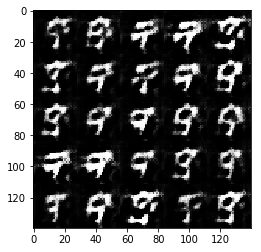

Epoch 1/2... Batch 710... Discriminator Loss: 0.8552... Generator Loss: 1.2402
Epoch 1/2... Batch 720... Discriminator Loss: 0.4862... Generator Loss: 2.3794
Epoch 1/2... Batch 730... Discriminator Loss: 0.6460... Generator Loss: 1.7395
Epoch 1/2... Batch 740... Discriminator Loss: 0.6441... Generator Loss: 2.6139
Epoch 1/2... Batch 750... Discriminator Loss: 0.6136... Generator Loss: 2.2549
Epoch 1/2... Batch 760... Discriminator Loss: 0.7101... Generator Loss: 3.3470
Epoch 1/2... Batch 770... Discriminator Loss: 0.7095... Generator Loss: 1.5898
Epoch 1/2... Batch 780... Discriminator Loss: 0.5608... Generator Loss: 3.2644
Epoch 1/2... Batch 790... Discriminator Loss: 0.6426... Generator Loss: 1.6454
Epoch 1/2... Batch 800... Discriminator Loss: 0.5367... Generator Loss: 2.7214


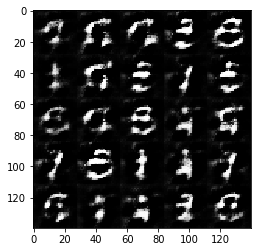

Epoch 1/2... Batch 810... Discriminator Loss: 0.5554... Generator Loss: 2.3798
Epoch 1/2... Batch 820... Discriminator Loss: 0.5495... Generator Loss: 2.5023
Epoch 1/2... Batch 830... Discriminator Loss: 0.7666... Generator Loss: 1.3513
Epoch 1/2... Batch 840... Discriminator Loss: 0.6110... Generator Loss: 2.0725
Epoch 1/2... Batch 850... Discriminator Loss: 0.9280... Generator Loss: 1.0641
Epoch 1/2... Batch 860... Discriminator Loss: 0.6097... Generator Loss: 2.2982
Epoch 1/2... Batch 870... Discriminator Loss: 0.7027... Generator Loss: 2.8333
Epoch 1/2... Batch 880... Discriminator Loss: 1.2760... Generator Loss: 4.8655
Epoch 1/2... Batch 890... Discriminator Loss: 0.6736... Generator Loss: 2.3520
Epoch 1/2... Batch 900... Discriminator Loss: 0.5749... Generator Loss: 2.0281


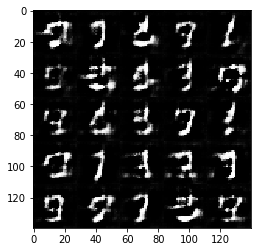

Epoch 1/2... Batch 910... Discriminator Loss: 0.6644... Generator Loss: 2.3319
Epoch 1/2... Batch 920... Discriminator Loss: 0.7824... Generator Loss: 1.4281
Epoch 1/2... Batch 930... Discriminator Loss: 0.6854... Generator Loss: 1.6806
Epoch 1/2... Batch 940... Discriminator Loss: 0.5130... Generator Loss: 2.7912
Epoch 1/2... Batch 950... Discriminator Loss: 1.3053... Generator Loss: 2.8048
Epoch 1/2... Batch 960... Discriminator Loss: 0.8254... Generator Loss: 1.6926
Epoch 1/2... Batch 970... Discriminator Loss: 0.9650... Generator Loss: 1.3039
Epoch 1/2... Batch 980... Discriminator Loss: 1.1975... Generator Loss: 0.7648
Epoch 1/2... Batch 990... Discriminator Loss: 1.0314... Generator Loss: 1.3389
Epoch 1/2... Batch 1000... Discriminator Loss: 0.6983... Generator Loss: 1.6933


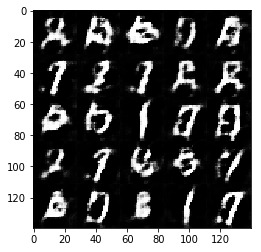

Epoch 1/2... Batch 1010... Discriminator Loss: 0.6927... Generator Loss: 1.6562
Epoch 1/2... Batch 1020... Discriminator Loss: 0.6414... Generator Loss: 1.7918
Epoch 1/2... Batch 1030... Discriminator Loss: 0.6818... Generator Loss: 2.0077
Epoch 1/2... Batch 1040... Discriminator Loss: 0.6537... Generator Loss: 1.7716
Epoch 1/2... Batch 1050... Discriminator Loss: 0.8410... Generator Loss: 1.8059
Epoch 1/2... Batch 1060... Discriminator Loss: 0.7568... Generator Loss: 1.3267
Epoch 1/2... Batch 1070... Discriminator Loss: 0.7153... Generator Loss: 1.5079
Epoch 1/2... Batch 1080... Discriminator Loss: 1.0256... Generator Loss: 0.8531
Epoch 1/2... Batch 1090... Discriminator Loss: 0.8512... Generator Loss: 1.3458
Epoch 1/2... Batch 1100... Discriminator Loss: 0.8010... Generator Loss: 1.5680


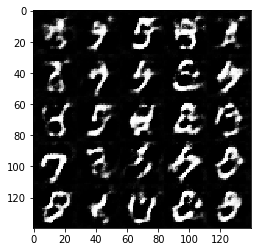

Epoch 1/2... Batch 1110... Discriminator Loss: 0.8128... Generator Loss: 1.3303
Epoch 1/2... Batch 1120... Discriminator Loss: 0.9494... Generator Loss: 2.4616
Epoch 1/2... Batch 1130... Discriminator Loss: 1.0213... Generator Loss: 2.3918
Epoch 1/2... Batch 1140... Discriminator Loss: 0.9555... Generator Loss: 1.1120
Epoch 1/2... Batch 1150... Discriminator Loss: 0.7917... Generator Loss: 1.6047
Epoch 1/2... Batch 1160... Discriminator Loss: 0.8933... Generator Loss: 1.3308
Epoch 1/2... Batch 1170... Discriminator Loss: 0.7482... Generator Loss: 1.7996
Epoch 1/2... Batch 1180... Discriminator Loss: 0.9197... Generator Loss: 2.3093
Epoch 1/2... Batch 1190... Discriminator Loss: 0.8789... Generator Loss: 2.1461
Epoch 1/2... Batch 1200... Discriminator Loss: 0.8497... Generator Loss: 1.6224


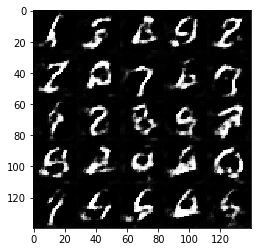

Epoch 1/2... Batch 1210... Discriminator Loss: 0.8986... Generator Loss: 1.3737
Epoch 1/2... Batch 1220... Discriminator Loss: 0.7425... Generator Loss: 1.7331
Epoch 1/2... Batch 1230... Discriminator Loss: 1.1663... Generator Loss: 0.8098
Epoch 1/2... Batch 1240... Discriminator Loss: 0.8789... Generator Loss: 1.4970
Epoch 1/2... Batch 1250... Discriminator Loss: 1.1688... Generator Loss: 0.8115
Epoch 1/2... Batch 1260... Discriminator Loss: 0.8289... Generator Loss: 1.5515
Epoch 1/2... Batch 1270... Discriminator Loss: 0.8710... Generator Loss: 1.8825
Epoch 1/2... Batch 1280... Discriminator Loss: 0.7670... Generator Loss: 1.8726
Epoch 1/2... Batch 1290... Discriminator Loss: 0.9557... Generator Loss: 1.0099
Epoch 1/2... Batch 1300... Discriminator Loss: 0.9056... Generator Loss: 1.2436


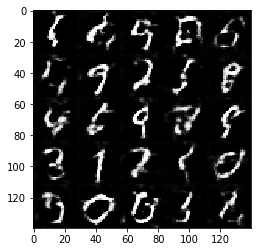

Epoch 1/2... Batch 1310... Discriminator Loss: 1.1969... Generator Loss: 0.7990
Epoch 1/2... Batch 1320... Discriminator Loss: 0.9328... Generator Loss: 1.6641
Epoch 1/2... Batch 1330... Discriminator Loss: 1.0300... Generator Loss: 1.5859
Epoch 1/2... Batch 1340... Discriminator Loss: 0.9258... Generator Loss: 1.0737
Epoch 1/2... Batch 1350... Discriminator Loss: 1.0919... Generator Loss: 0.9038
Epoch 1/2... Batch 1360... Discriminator Loss: 0.9701... Generator Loss: 1.0079
Epoch 1/2... Batch 1370... Discriminator Loss: 1.1889... Generator Loss: 2.6174
Epoch 1/2... Batch 1380... Discriminator Loss: 0.8604... Generator Loss: 1.3281
Epoch 1/2... Batch 1390... Discriminator Loss: 1.3909... Generator Loss: 0.5948
Epoch 1/2... Batch 1400... Discriminator Loss: 0.8687... Generator Loss: 1.3874


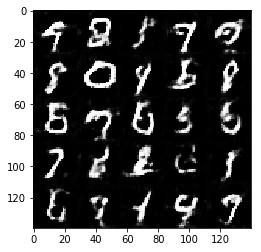

Epoch 1/2... Batch 1410... Discriminator Loss: 0.9626... Generator Loss: 0.9362
Epoch 1/2... Batch 1420... Discriminator Loss: 0.8087... Generator Loss: 1.8273
Epoch 1/2... Batch 1430... Discriminator Loss: 0.8282... Generator Loss: 1.2881
Epoch 1/2... Batch 1440... Discriminator Loss: 1.1782... Generator Loss: 0.7826
Epoch 1/2... Batch 1450... Discriminator Loss: 0.8887... Generator Loss: 1.2596
Epoch 1/2... Batch 1460... Discriminator Loss: 0.8524... Generator Loss: 1.7804
Epoch 1/2... Batch 1470... Discriminator Loss: 0.9756... Generator Loss: 0.9883
Epoch 1/2... Batch 1480... Discriminator Loss: 0.9018... Generator Loss: 1.3175
Epoch 1/2... Batch 1490... Discriminator Loss: 0.9971... Generator Loss: 0.9782
Epoch 1/2... Batch 1500... Discriminator Loss: 0.9422... Generator Loss: 1.0420


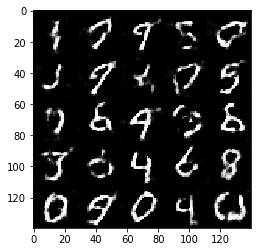

Epoch 1/2... Batch 1510... Discriminator Loss: 1.1036... Generator Loss: 1.8996
Epoch 1/2... Batch 1520... Discriminator Loss: 0.9623... Generator Loss: 1.0710
Epoch 1/2... Batch 1530... Discriminator Loss: 1.0187... Generator Loss: 0.9475
Epoch 1/2... Batch 1540... Discriminator Loss: 0.9220... Generator Loss: 1.0950
Epoch 1/2... Batch 1550... Discriminator Loss: 1.0943... Generator Loss: 1.7602
Epoch 1/2... Batch 1560... Discriminator Loss: 0.8194... Generator Loss: 1.8974
Epoch 1/2... Batch 1570... Discriminator Loss: 1.3088... Generator Loss: 1.8014
Epoch 1/2... Batch 1580... Discriminator Loss: 1.1616... Generator Loss: 0.7545
Epoch 1/2... Batch 1590... Discriminator Loss: 0.9185... Generator Loss: 1.3323
Epoch 1/2... Batch 1600... Discriminator Loss: 0.9939... Generator Loss: 1.1031


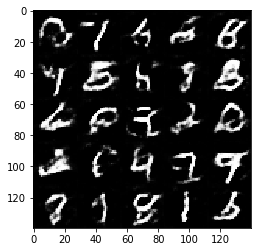

Epoch 1/2... Batch 1610... Discriminator Loss: 0.8668... Generator Loss: 1.1806
Epoch 1/2... Batch 1620... Discriminator Loss: 0.9334... Generator Loss: 1.2730
Epoch 1/2... Batch 1630... Discriminator Loss: 0.9864... Generator Loss: 1.1612
Epoch 1/2... Batch 1640... Discriminator Loss: 1.2209... Generator Loss: 0.6297
Epoch 1/2... Batch 1650... Discriminator Loss: 0.9679... Generator Loss: 1.3253
Epoch 1/2... Batch 1660... Discriminator Loss: 1.2336... Generator Loss: 0.6888
Epoch 1/2... Batch 1670... Discriminator Loss: 1.0522... Generator Loss: 0.9380
Epoch 1/2... Batch 1680... Discriminator Loss: 1.1734... Generator Loss: 0.6749
Epoch 1/2... Batch 1690... Discriminator Loss: 1.0207... Generator Loss: 1.2373
Epoch 1/2... Batch 1700... Discriminator Loss: 1.0004... Generator Loss: 0.9669


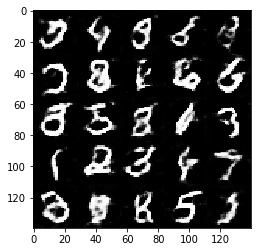

Epoch 1/2... Batch 1710... Discriminator Loss: 1.3868... Generator Loss: 0.5703
Epoch 1/2... Batch 1720... Discriminator Loss: 0.9810... Generator Loss: 1.1735
Epoch 1/2... Batch 1730... Discriminator Loss: 1.0063... Generator Loss: 0.8983
Epoch 1/2... Batch 1740... Discriminator Loss: 0.9343... Generator Loss: 1.1936
Epoch 1/2... Batch 1750... Discriminator Loss: 0.9267... Generator Loss: 1.5962
Epoch 1/2... Batch 1760... Discriminator Loss: 0.9160... Generator Loss: 1.1737
Epoch 1/2... Batch 1770... Discriminator Loss: 1.1046... Generator Loss: 2.0339
Epoch 1/2... Batch 1780... Discriminator Loss: 0.9290... Generator Loss: 1.0787
Epoch 1/2... Batch 1790... Discriminator Loss: 0.8812... Generator Loss: 1.2115
Epoch 1/2... Batch 1800... Discriminator Loss: 1.0257... Generator Loss: 0.8671


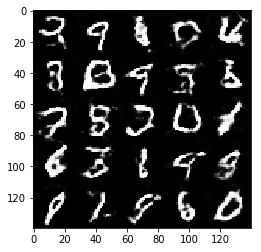

Epoch 1/2... Batch 1810... Discriminator Loss: 0.9546... Generator Loss: 1.1008
Epoch 1/2... Batch 1820... Discriminator Loss: 1.1517... Generator Loss: 0.6663
Epoch 1/2... Batch 1830... Discriminator Loss: 0.9644... Generator Loss: 1.6203
Epoch 1/2... Batch 1840... Discriminator Loss: 0.9036... Generator Loss: 1.3205
Epoch 1/2... Batch 1850... Discriminator Loss: 0.8455... Generator Loss: 1.3313
Epoch 1/2... Batch 1860... Discriminator Loss: 1.0126... Generator Loss: 0.9824
Epoch 1/2... Batch 1870... Discriminator Loss: 1.3265... Generator Loss: 0.6187
Epoch 2/2... Batch 10... Discriminator Loss: 0.8712... Generator Loss: 1.5977
Epoch 2/2... Batch 20... Discriminator Loss: 0.7898... Generator Loss: 1.8113
Epoch 2/2... Batch 30... Discriminator Loss: 1.2756... Generator Loss: 1.6817
Epoch 2/2... Batch 40... Discriminator Loss: 1.0715... Generator Loss: 0.8490
Epoch 2/2... Batch 50... Discriminator Loss: 0.9315... Generator Loss: 1.4314
Epoch 2/2... Batch 60... Discriminator Loss: 1.114

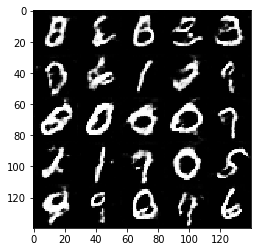

Epoch 2/2... Batch 110... Discriminator Loss: 0.9720... Generator Loss: 0.9467
Epoch 2/2... Batch 120... Discriminator Loss: 1.0808... Generator Loss: 0.8968
Epoch 2/2... Batch 130... Discriminator Loss: 0.9870... Generator Loss: 0.9688
Epoch 2/2... Batch 140... Discriminator Loss: 0.7503... Generator Loss: 1.6200
Epoch 2/2... Batch 150... Discriminator Loss: 0.9626... Generator Loss: 1.1936
Epoch 2/2... Batch 160... Discriminator Loss: 0.9273... Generator Loss: 1.0911
Epoch 2/2... Batch 170... Discriminator Loss: 0.9581... Generator Loss: 1.0164
Epoch 2/2... Batch 180... Discriminator Loss: 1.1765... Generator Loss: 1.0924
Epoch 2/2... Batch 190... Discriminator Loss: 0.8459... Generator Loss: 1.5489
Epoch 2/2... Batch 200... Discriminator Loss: 1.0118... Generator Loss: 1.0020


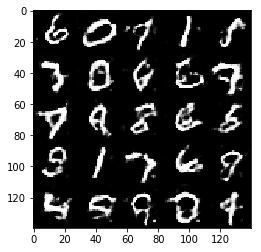

Epoch 2/2... Batch 210... Discriminator Loss: 0.9546... Generator Loss: 1.0854
Epoch 2/2... Batch 220... Discriminator Loss: 0.9179... Generator Loss: 1.0970
Epoch 2/2... Batch 230... Discriminator Loss: 0.8252... Generator Loss: 1.5360
Epoch 2/2... Batch 240... Discriminator Loss: 1.0534... Generator Loss: 0.9510
Epoch 2/2... Batch 250... Discriminator Loss: 0.8026... Generator Loss: 1.2491
Epoch 2/2... Batch 260... Discriminator Loss: 1.1570... Generator Loss: 0.7149
Epoch 2/2... Batch 270... Discriminator Loss: 0.9789... Generator Loss: 1.6493
Epoch 2/2... Batch 280... Discriminator Loss: 0.8108... Generator Loss: 1.2375
Epoch 2/2... Batch 290... Discriminator Loss: 0.8644... Generator Loss: 1.5865
Epoch 2/2... Batch 300... Discriminator Loss: 1.3371... Generator Loss: 0.6133


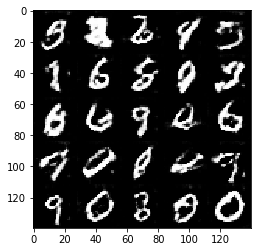

Epoch 2/2... Batch 310... Discriminator Loss: 1.2154... Generator Loss: 0.6525
Epoch 2/2... Batch 320... Discriminator Loss: 0.9164... Generator Loss: 1.1195
Epoch 2/2... Batch 330... Discriminator Loss: 1.0328... Generator Loss: 0.9791
Epoch 2/2... Batch 340... Discriminator Loss: 1.1630... Generator Loss: 1.3332
Epoch 2/2... Batch 350... Discriminator Loss: 0.9325... Generator Loss: 1.1679
Epoch 2/2... Batch 360... Discriminator Loss: 1.0487... Generator Loss: 1.4085
Epoch 2/2... Batch 370... Discriminator Loss: 1.2487... Generator Loss: 0.6357
Epoch 2/2... Batch 380... Discriminator Loss: 1.4032... Generator Loss: 3.3657
Epoch 2/2... Batch 390... Discriminator Loss: 0.9003... Generator Loss: 1.3476
Epoch 2/2... Batch 400... Discriminator Loss: 1.0416... Generator Loss: 0.8993


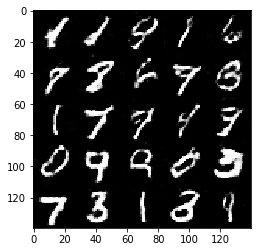

Epoch 2/2... Batch 410... Discriminator Loss: 0.8501... Generator Loss: 1.1609
Epoch 2/2... Batch 420... Discriminator Loss: 1.0853... Generator Loss: 0.8493
Epoch 2/2... Batch 430... Discriminator Loss: 0.8441... Generator Loss: 1.4416
Epoch 2/2... Batch 440... Discriminator Loss: 1.1533... Generator Loss: 0.6841
Epoch 2/2... Batch 450... Discriminator Loss: 0.9370... Generator Loss: 1.0215
Epoch 2/2... Batch 460... Discriminator Loss: 1.0233... Generator Loss: 0.8700
Epoch 2/2... Batch 470... Discriminator Loss: 1.2900... Generator Loss: 0.5666
Epoch 2/2... Batch 480... Discriminator Loss: 1.2709... Generator Loss: 0.6110
Epoch 2/2... Batch 490... Discriminator Loss: 0.8961... Generator Loss: 1.1079
Epoch 2/2... Batch 500... Discriminator Loss: 0.9616... Generator Loss: 1.2572


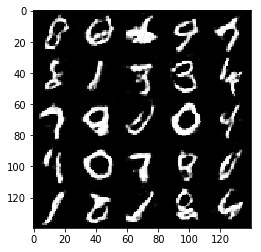

Epoch 2/2... Batch 510... Discriminator Loss: 0.8699... Generator Loss: 1.3490
Epoch 2/2... Batch 520... Discriminator Loss: 0.9242... Generator Loss: 1.0978
Epoch 2/2... Batch 530... Discriminator Loss: 0.8096... Generator Loss: 1.1705
Epoch 2/2... Batch 540... Discriminator Loss: 0.9584... Generator Loss: 0.9269
Epoch 2/2... Batch 550... Discriminator Loss: 1.4111... Generator Loss: 0.5343
Epoch 2/2... Batch 560... Discriminator Loss: 0.8694... Generator Loss: 1.1473
Epoch 2/2... Batch 570... Discriminator Loss: 1.0721... Generator Loss: 0.8158
Epoch 2/2... Batch 580... Discriminator Loss: 0.8819... Generator Loss: 0.9948
Epoch 2/2... Batch 590... Discriminator Loss: 0.9893... Generator Loss: 0.9995
Epoch 2/2... Batch 600... Discriminator Loss: 0.8570... Generator Loss: 1.3116


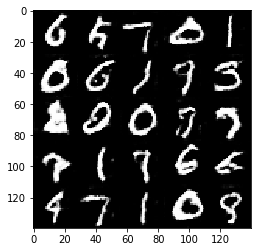

Epoch 2/2... Batch 610... Discriminator Loss: 0.9794... Generator Loss: 0.9505
Epoch 2/2... Batch 620... Discriminator Loss: 0.8861... Generator Loss: 1.0878
Epoch 2/2... Batch 630... Discriminator Loss: 0.9905... Generator Loss: 0.8965
Epoch 2/2... Batch 640... Discriminator Loss: 0.9213... Generator Loss: 1.0513
Epoch 2/2... Batch 650... Discriminator Loss: 0.9651... Generator Loss: 1.0493
Epoch 2/2... Batch 660... Discriminator Loss: 0.7257... Generator Loss: 1.5089
Epoch 2/2... Batch 670... Discriminator Loss: 0.8661... Generator Loss: 1.4649
Epoch 2/2... Batch 680... Discriminator Loss: 1.7060... Generator Loss: 0.6021
Epoch 2/2... Batch 690... Discriminator Loss: 0.7862... Generator Loss: 2.0870
Epoch 2/2... Batch 700... Discriminator Loss: 0.9783... Generator Loss: 1.0221


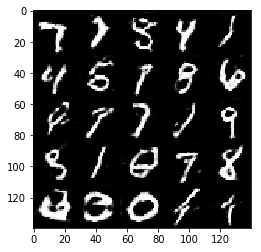

Epoch 2/2... Batch 710... Discriminator Loss: 0.9566... Generator Loss: 0.9766
Epoch 2/2... Batch 720... Discriminator Loss: 1.0642... Generator Loss: 0.7456
Epoch 2/2... Batch 730... Discriminator Loss: 0.9595... Generator Loss: 1.3914
Epoch 2/2... Batch 740... Discriminator Loss: 1.1741... Generator Loss: 2.2328
Epoch 2/2... Batch 750... Discriminator Loss: 0.8825... Generator Loss: 1.1571
Epoch 2/2... Batch 760... Discriminator Loss: 0.9637... Generator Loss: 1.0021
Epoch 2/2... Batch 770... Discriminator Loss: 0.6922... Generator Loss: 1.7965
Epoch 2/2... Batch 780... Discriminator Loss: 1.0880... Generator Loss: 0.8594
Epoch 2/2... Batch 790... Discriminator Loss: 0.7973... Generator Loss: 1.4018
Epoch 2/2... Batch 800... Discriminator Loss: 1.0595... Generator Loss: 2.0604


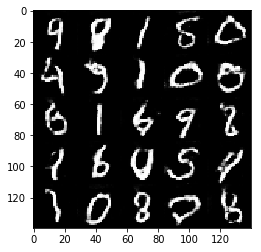

Epoch 2/2... Batch 810... Discriminator Loss: 0.8782... Generator Loss: 1.1669
Epoch 2/2... Batch 820... Discriminator Loss: 1.3285... Generator Loss: 0.5425
Epoch 2/2... Batch 830... Discriminator Loss: 0.7606... Generator Loss: 1.3871
Epoch 2/2... Batch 840... Discriminator Loss: 1.1302... Generator Loss: 0.7457
Epoch 2/2... Batch 850... Discriminator Loss: 0.8313... Generator Loss: 1.1502
Epoch 2/2... Batch 860... Discriminator Loss: 1.6710... Generator Loss: 2.8110
Epoch 2/2... Batch 870... Discriminator Loss: 0.7383... Generator Loss: 1.3459
Epoch 2/2... Batch 880... Discriminator Loss: 0.8834... Generator Loss: 1.5139
Epoch 2/2... Batch 890... Discriminator Loss: 0.8251... Generator Loss: 1.4013
Epoch 2/2... Batch 900... Discriminator Loss: 0.9064... Generator Loss: 1.0773


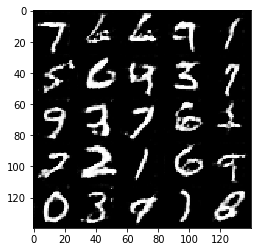

Epoch 2/2... Batch 910... Discriminator Loss: 0.9605... Generator Loss: 0.9252
Epoch 2/2... Batch 920... Discriminator Loss: 0.8851... Generator Loss: 1.1021
Epoch 2/2... Batch 930... Discriminator Loss: 0.7746... Generator Loss: 1.4535
Epoch 2/2... Batch 940... Discriminator Loss: 0.9953... Generator Loss: 1.0559
Epoch 2/2... Batch 950... Discriminator Loss: 1.1827... Generator Loss: 0.6548
Epoch 2/2... Batch 960... Discriminator Loss: 0.8021... Generator Loss: 1.3153
Epoch 2/2... Batch 970... Discriminator Loss: 1.1357... Generator Loss: 0.7356
Epoch 2/2... Batch 980... Discriminator Loss: 0.9356... Generator Loss: 0.9935
Epoch 2/2... Batch 990... Discriminator Loss: 1.0708... Generator Loss: 0.7627
Epoch 2/2... Batch 1000... Discriminator Loss: 1.2397... Generator Loss: 0.6139


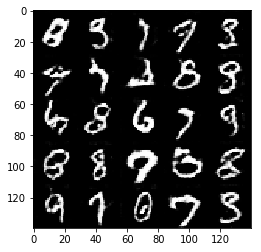

Epoch 2/2... Batch 1010... Discriminator Loss: 0.9953... Generator Loss: 2.6011
Epoch 2/2... Batch 1020... Discriminator Loss: 0.8990... Generator Loss: 1.0662
Epoch 2/2... Batch 1030... Discriminator Loss: 0.8291... Generator Loss: 1.1148
Epoch 2/2... Batch 1040... Discriminator Loss: 1.9445... Generator Loss: 0.3412
Epoch 2/2... Batch 1050... Discriminator Loss: 0.9887... Generator Loss: 1.0232
Epoch 2/2... Batch 1060... Discriminator Loss: 0.8869... Generator Loss: 1.0434
Epoch 2/2... Batch 1070... Discriminator Loss: 0.9093... Generator Loss: 1.0339
Epoch 2/2... Batch 1080... Discriminator Loss: 0.9331... Generator Loss: 0.9631
Epoch 2/2... Batch 1090... Discriminator Loss: 0.8868... Generator Loss: 1.1907
Epoch 2/2... Batch 1100... Discriminator Loss: 0.8507... Generator Loss: 1.2538


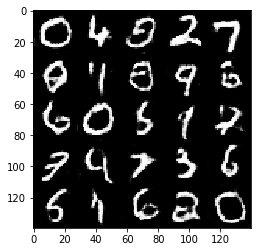

Epoch 2/2... Batch 1110... Discriminator Loss: 0.8062... Generator Loss: 1.4101
Epoch 2/2... Batch 1120... Discriminator Loss: 1.0986... Generator Loss: 0.8673
Epoch 2/2... Batch 1130... Discriminator Loss: 1.6562... Generator Loss: 0.3823
Epoch 2/2... Batch 1140... Discriminator Loss: 0.9710... Generator Loss: 1.9183
Epoch 2/2... Batch 1150... Discriminator Loss: 0.9104... Generator Loss: 1.5697
Epoch 2/2... Batch 1160... Discriminator Loss: 0.9658... Generator Loss: 0.9957
Epoch 2/2... Batch 1170... Discriminator Loss: 3.8607... Generator Loss: 5.8325
Epoch 2/2... Batch 1180... Discriminator Loss: 0.9687... Generator Loss: 1.0613
Epoch 2/2... Batch 1190... Discriminator Loss: 0.8100... Generator Loss: 1.3370
Epoch 2/2... Batch 1200... Discriminator Loss: 1.1285... Generator Loss: 0.7966


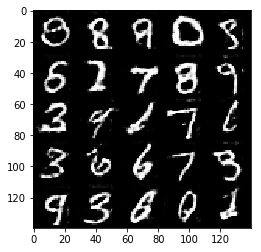

Epoch 2/2... Batch 1210... Discriminator Loss: 0.7790... Generator Loss: 1.3011
Epoch 2/2... Batch 1220... Discriminator Loss: 0.8560... Generator Loss: 1.1464
Epoch 2/2... Batch 1230... Discriminator Loss: 0.9474... Generator Loss: 0.9609
Epoch 2/2... Batch 1240... Discriminator Loss: 0.8115... Generator Loss: 1.5651
Epoch 2/2... Batch 1250... Discriminator Loss: 1.1650... Generator Loss: 0.7347
Epoch 2/2... Batch 1260... Discriminator Loss: 0.8803... Generator Loss: 1.0394
Epoch 2/2... Batch 1270... Discriminator Loss: 0.8430... Generator Loss: 1.1542
Epoch 2/2... Batch 1280... Discriminator Loss: 0.7516... Generator Loss: 1.5062
Epoch 2/2... Batch 1290... Discriminator Loss: 1.3357... Generator Loss: 0.5491
Epoch 2/2... Batch 1300... Discriminator Loss: 0.9953... Generator Loss: 0.8544


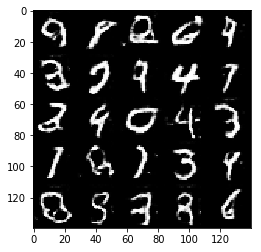

Epoch 2/2... Batch 1310... Discriminator Loss: 0.9460... Generator Loss: 1.2797
Epoch 2/2... Batch 1320... Discriminator Loss: 0.8979... Generator Loss: 1.0117
Epoch 2/2... Batch 1330... Discriminator Loss: 1.2185... Generator Loss: 0.6489
Epoch 2/2... Batch 1340... Discriminator Loss: 1.1796... Generator Loss: 0.6161
Epoch 2/2... Batch 1350... Discriminator Loss: 1.0718... Generator Loss: 1.2773
Epoch 2/2... Batch 1360... Discriminator Loss: 1.0659... Generator Loss: 2.5407
Epoch 2/2... Batch 1370... Discriminator Loss: 0.6919... Generator Loss: 2.0322
Epoch 2/2... Batch 1380... Discriminator Loss: 1.0430... Generator Loss: 0.8214
Epoch 2/2... Batch 1390... Discriminator Loss: 1.1305... Generator Loss: 0.7669
Epoch 2/2... Batch 1400... Discriminator Loss: 0.7756... Generator Loss: 1.2551


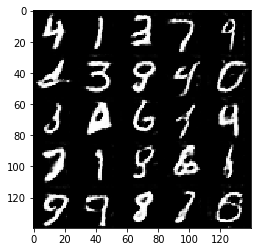

Epoch 2/2... Batch 1410... Discriminator Loss: 0.9962... Generator Loss: 0.8126
Epoch 2/2... Batch 1420... Discriminator Loss: 0.8395... Generator Loss: 1.2312
Epoch 2/2... Batch 1430... Discriminator Loss: 0.9551... Generator Loss: 0.9191
Epoch 2/2... Batch 1440... Discriminator Loss: 0.9025... Generator Loss: 1.0228
Epoch 2/2... Batch 1450... Discriminator Loss: 1.0389... Generator Loss: 0.8465
Epoch 2/2... Batch 1460... Discriminator Loss: 0.7707... Generator Loss: 1.8846
Epoch 2/2... Batch 1470... Discriminator Loss: 2.0225... Generator Loss: 0.3039
Epoch 2/2... Batch 1480... Discriminator Loss: 1.2433... Generator Loss: 0.6809
Epoch 2/2... Batch 1490... Discriminator Loss: 0.8895... Generator Loss: 2.1169
Epoch 2/2... Batch 1500... Discriminator Loss: 0.8585... Generator Loss: 1.1373


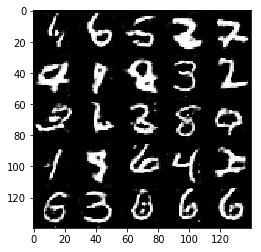

Epoch 2/2... Batch 1510... Discriminator Loss: 1.0873... Generator Loss: 0.8081
Epoch 2/2... Batch 1520... Discriminator Loss: 0.7913... Generator Loss: 1.2716
Epoch 2/2... Batch 1530... Discriminator Loss: 1.3187... Generator Loss: 0.5485
Epoch 2/2... Batch 1540... Discriminator Loss: 0.9911... Generator Loss: 0.9074
Epoch 2/2... Batch 1550... Discriminator Loss: 0.8044... Generator Loss: 1.1932
Epoch 2/2... Batch 1560... Discriminator Loss: 0.8891... Generator Loss: 1.0003
Epoch 2/2... Batch 1570... Discriminator Loss: 1.0039... Generator Loss: 0.9372
Epoch 2/2... Batch 1580... Discriminator Loss: 0.9098... Generator Loss: 1.1842
Epoch 2/2... Batch 1590... Discriminator Loss: 1.8341... Generator Loss: 0.3603
Epoch 2/2... Batch 1600... Discriminator Loss: 0.8574... Generator Loss: 1.4962


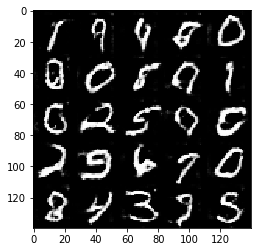

Epoch 2/2... Batch 1610... Discriminator Loss: 0.9816... Generator Loss: 0.8860
Epoch 2/2... Batch 1620... Discriminator Loss: 0.6984... Generator Loss: 1.3316
Epoch 2/2... Batch 1630... Discriminator Loss: 0.7234... Generator Loss: 1.7455
Epoch 2/2... Batch 1640... Discriminator Loss: 0.7356... Generator Loss: 1.5100
Epoch 2/2... Batch 1650... Discriminator Loss: 0.8730... Generator Loss: 1.5695
Epoch 2/2... Batch 1660... Discriminator Loss: 0.9373... Generator Loss: 1.4617
Epoch 2/2... Batch 1670... Discriminator Loss: 0.7914... Generator Loss: 1.3556
Epoch 2/2... Batch 1680... Discriminator Loss: 0.8307... Generator Loss: 1.1195
Epoch 2/2... Batch 1690... Discriminator Loss: 0.8279... Generator Loss: 1.0835
Epoch 2/2... Batch 1700... Discriminator Loss: 1.4783... Generator Loss: 0.4723


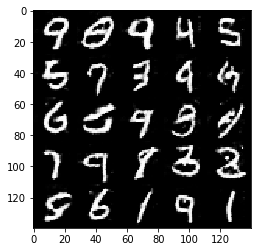

Epoch 2/2... Batch 1710... Discriminator Loss: 0.7023... Generator Loss: 1.5870
Epoch 2/2... Batch 1720... Discriminator Loss: 0.8431... Generator Loss: 1.1250
Epoch 2/2... Batch 1730... Discriminator Loss: 0.7061... Generator Loss: 1.4067
Epoch 2/2... Batch 1740... Discriminator Loss: 0.6868... Generator Loss: 2.1600
Epoch 2/2... Batch 1750... Discriminator Loss: 0.8940... Generator Loss: 1.1109
Epoch 2/2... Batch 1760... Discriminator Loss: 0.7879... Generator Loss: 1.5975
Epoch 2/2... Batch 1770... Discriminator Loss: 1.1352... Generator Loss: 2.4935
Epoch 2/2... Batch 1780... Discriminator Loss: 0.8917... Generator Loss: 1.2187
Epoch 2/2... Batch 1790... Discriminator Loss: 0.7530... Generator Loss: 1.3314
Epoch 2/2... Batch 1800... Discriminator Loss: 0.8199... Generator Loss: 1.1631


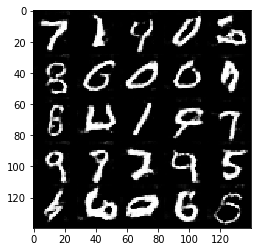

Epoch 2/2... Batch 1810... Discriminator Loss: 0.9499... Generator Loss: 1.0333
Epoch 2/2... Batch 1820... Discriminator Loss: 0.9670... Generator Loss: 0.8929
Epoch 2/2... Batch 1830... Discriminator Loss: 0.7748... Generator Loss: 1.7585
Epoch 2/2... Batch 1840... Discriminator Loss: 0.9977... Generator Loss: 0.8919
Epoch 2/2... Batch 1850... Discriminator Loss: 1.1949... Generator Loss: 0.6345
Epoch 2/2... Batch 1860... Discriminator Loss: 1.1743... Generator Loss: 0.6842
Epoch 2/2... Batch 1870... Discriminator Loss: 0.9428... Generator Loss: 1.0897


In [28]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 1.2880... Generator Loss: 0.7758
Epoch 1/1... Batch 20... Discriminator Loss: 0.5563... Generator Loss: 3.5431
Epoch 1/1... Batch 30... Discriminator Loss: 0.4446... Generator Loss: 5.3367
Epoch 1/1... Batch 40... Discriminator Loss: 0.9549... Generator Loss: 0.8454
Epoch 1/1... Batch 50... Discriminator Loss: 0.4296... Generator Loss: 4.3731
Epoch 1/1... Batch 60... Discriminator Loss: 0.7035... Generator Loss: 4.4742
Epoch 1/1... Batch 70... Discriminator Loss: 1.2590... Generator Loss: 6.7956
Epoch 1/1... Batch 80... Discriminator Loss: 0.6181... Generator Loss: 5.2890
Epoch 1/1... Batch 90... Discriminator Loss: 0.8598... Generator Loss: 3.3936
Epoch 1/1... Batch 100... Discriminator Loss: 0.7776... Generator Loss: 1.6617


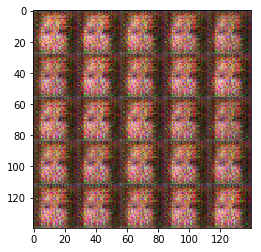

Epoch 1/1... Batch 110... Discriminator Loss: 0.5448... Generator Loss: 2.0048
Epoch 1/1... Batch 120... Discriminator Loss: 0.7991... Generator Loss: 1.6122
Epoch 1/1... Batch 130... Discriminator Loss: 1.3269... Generator Loss: 0.7559
Epoch 1/1... Batch 140... Discriminator Loss: 0.9863... Generator Loss: 1.5849
Epoch 1/1... Batch 150... Discriminator Loss: 0.6998... Generator Loss: 1.8099
Epoch 1/1... Batch 160... Discriminator Loss: 1.1065... Generator Loss: 0.6968
Epoch 1/1... Batch 170... Discriminator Loss: 1.5362... Generator Loss: 0.4097
Epoch 1/1... Batch 180... Discriminator Loss: 1.0458... Generator Loss: 1.0460
Epoch 1/1... Batch 190... Discriminator Loss: 0.6458... Generator Loss: 2.1555
Epoch 1/1... Batch 200... Discriminator Loss: 1.0375... Generator Loss: 0.9179


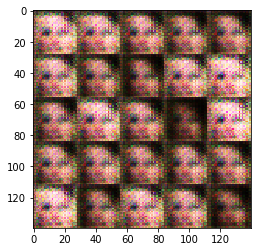

Epoch 1/1... Batch 210... Discriminator Loss: 0.8534... Generator Loss: 2.0522
Epoch 1/1... Batch 220... Discriminator Loss: 0.4794... Generator Loss: 3.6016
Epoch 1/1... Batch 230... Discriminator Loss: 0.7443... Generator Loss: 1.4381
Epoch 1/1... Batch 240... Discriminator Loss: 0.7481... Generator Loss: 1.3493
Epoch 1/1... Batch 250... Discriminator Loss: 0.8904... Generator Loss: 1.7820
Epoch 1/1... Batch 260... Discriminator Loss: 0.5985... Generator Loss: 3.1717
Epoch 1/1... Batch 270... Discriminator Loss: 0.7089... Generator Loss: 2.5558
Epoch 1/1... Batch 280... Discriminator Loss: 0.6969... Generator Loss: 2.8719
Epoch 1/1... Batch 290... Discriminator Loss: 0.5364... Generator Loss: 3.4481
Epoch 1/1... Batch 300... Discriminator Loss: 0.9305... Generator Loss: 1.5775


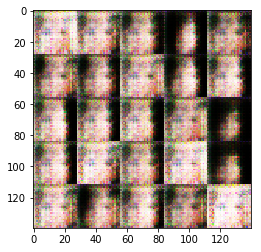

Epoch 1/1... Batch 310... Discriminator Loss: 0.6703... Generator Loss: 1.7913
Epoch 1/1... Batch 320... Discriminator Loss: 0.7498... Generator Loss: 1.6732
Epoch 1/1... Batch 330... Discriminator Loss: 0.7057... Generator Loss: 2.1338
Epoch 1/1... Batch 340... Discriminator Loss: 0.8650... Generator Loss: 1.7581
Epoch 1/1... Batch 350... Discriminator Loss: 0.9418... Generator Loss: 3.3113
Epoch 1/1... Batch 360... Discriminator Loss: 1.0347... Generator Loss: 1.0020
Epoch 1/1... Batch 370... Discriminator Loss: 1.6831... Generator Loss: 0.4537
Epoch 1/1... Batch 380... Discriminator Loss: 1.2412... Generator Loss: 0.7391
Epoch 1/1... Batch 390... Discriminator Loss: 1.0260... Generator Loss: 1.1702
Epoch 1/1... Batch 400... Discriminator Loss: 0.9258... Generator Loss: 1.2065


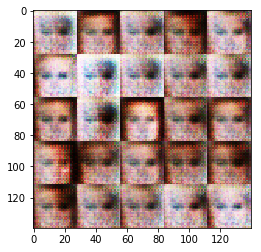

Epoch 1/1... Batch 410... Discriminator Loss: 0.9905... Generator Loss: 1.0101
Epoch 1/1... Batch 420... Discriminator Loss: 0.8435... Generator Loss: 1.3633
Epoch 1/1... Batch 430... Discriminator Loss: 0.6377... Generator Loss: 1.9433
Epoch 1/1... Batch 440... Discriminator Loss: 1.0299... Generator Loss: 0.9209
Epoch 1/1... Batch 450... Discriminator Loss: 0.9256... Generator Loss: 1.4475
Epoch 1/1... Batch 460... Discriminator Loss: 0.9216... Generator Loss: 2.1177
Epoch 1/1... Batch 470... Discriminator Loss: 0.8383... Generator Loss: 1.6135
Epoch 1/1... Batch 480... Discriminator Loss: 0.7114... Generator Loss: 1.9692
Epoch 1/1... Batch 490... Discriminator Loss: 0.6806... Generator Loss: 1.6929
Epoch 1/1... Batch 500... Discriminator Loss: 0.8507... Generator Loss: 1.2171


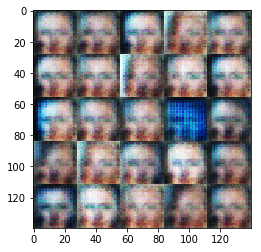

Epoch 1/1... Batch 510... Discriminator Loss: 1.3027... Generator Loss: 0.9318
Epoch 1/1... Batch 520... Discriminator Loss: 1.1808... Generator Loss: 1.7527
Epoch 1/1... Batch 530... Discriminator Loss: 0.8923... Generator Loss: 1.5419
Epoch 1/1... Batch 540... Discriminator Loss: 0.8219... Generator Loss: 1.2854
Epoch 1/1... Batch 550... Discriminator Loss: 0.7022... Generator Loss: 1.6011
Epoch 1/1... Batch 560... Discriminator Loss: 1.4315... Generator Loss: 4.7150
Epoch 1/1... Batch 570... Discriminator Loss: 0.9928... Generator Loss: 1.1479
Epoch 1/1... Batch 580... Discriminator Loss: 0.7459... Generator Loss: 1.7375
Epoch 1/1... Batch 590... Discriminator Loss: 0.8728... Generator Loss: 1.0783
Epoch 1/1... Batch 600... Discriminator Loss: 0.8745... Generator Loss: 1.1763


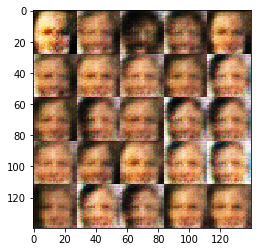

Epoch 1/1... Batch 610... Discriminator Loss: 0.7349... Generator Loss: 2.0993
Epoch 1/1... Batch 620... Discriminator Loss: 0.9258... Generator Loss: 1.3610
Epoch 1/1... Batch 630... Discriminator Loss: 0.7622... Generator Loss: 1.6181
Epoch 1/1... Batch 640... Discriminator Loss: 1.0719... Generator Loss: 0.9387
Epoch 1/1... Batch 650... Discriminator Loss: 0.6860... Generator Loss: 1.8406
Epoch 1/1... Batch 660... Discriminator Loss: 0.8393... Generator Loss: 1.4927
Epoch 1/1... Batch 670... Discriminator Loss: 0.7779... Generator Loss: 1.8695
Epoch 1/1... Batch 680... Discriminator Loss: 1.1662... Generator Loss: 0.8291
Epoch 1/1... Batch 690... Discriminator Loss: 0.8089... Generator Loss: 1.4982
Epoch 1/1... Batch 700... Discriminator Loss: 1.4589... Generator Loss: 0.7147


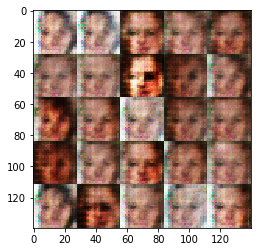

Epoch 1/1... Batch 710... Discriminator Loss: 0.9330... Generator Loss: 1.3925
Epoch 1/1... Batch 720... Discriminator Loss: 0.7049... Generator Loss: 2.1760
Epoch 1/1... Batch 730... Discriminator Loss: 0.8229... Generator Loss: 1.4217
Epoch 1/1... Batch 740... Discriminator Loss: 0.8137... Generator Loss: 1.4509
Epoch 1/1... Batch 750... Discriminator Loss: 0.7123... Generator Loss: 1.8937
Epoch 1/1... Batch 760... Discriminator Loss: 0.8115... Generator Loss: 2.0524
Epoch 1/1... Batch 770... Discriminator Loss: 1.0527... Generator Loss: 1.3715
Epoch 1/1... Batch 780... Discriminator Loss: 1.2355... Generator Loss: 0.6498
Epoch 1/1... Batch 790... Discriminator Loss: 1.0388... Generator Loss: 1.0880
Epoch 1/1... Batch 800... Discriminator Loss: 0.9857... Generator Loss: 1.0774


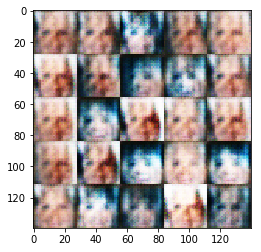

Epoch 1/1... Batch 810... Discriminator Loss: 0.9304... Generator Loss: 1.1437
Epoch 1/1... Batch 820... Discriminator Loss: 0.8848... Generator Loss: 1.2561
Epoch 1/1... Batch 830... Discriminator Loss: 0.7963... Generator Loss: 1.4491
Epoch 1/1... Batch 840... Discriminator Loss: 0.9776... Generator Loss: 1.0417
Epoch 1/1... Batch 850... Discriminator Loss: 1.0040... Generator Loss: 1.0997
Epoch 1/1... Batch 860... Discriminator Loss: 0.8537... Generator Loss: 1.6145
Epoch 1/1... Batch 870... Discriminator Loss: 0.9042... Generator Loss: 1.3915
Epoch 1/1... Batch 880... Discriminator Loss: 0.8221... Generator Loss: 2.9491
Epoch 1/1... Batch 890... Discriminator Loss: 0.8346... Generator Loss: 1.2183
Epoch 1/1... Batch 900... Discriminator Loss: 1.0942... Generator Loss: 2.5855


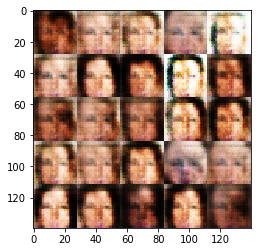

Epoch 1/1... Batch 910... Discriminator Loss: 0.8824... Generator Loss: 1.7689
Epoch 1/1... Batch 920... Discriminator Loss: 0.9683... Generator Loss: 1.3233
Epoch 1/1... Batch 930... Discriminator Loss: 1.1393... Generator Loss: 0.8168
Epoch 1/1... Batch 940... Discriminator Loss: 0.8686... Generator Loss: 1.4684
Epoch 1/1... Batch 950... Discriminator Loss: 0.7529... Generator Loss: 1.5662
Epoch 1/1... Batch 960... Discriminator Loss: 0.7247... Generator Loss: 1.4655
Epoch 1/1... Batch 970... Discriminator Loss: 0.8103... Generator Loss: 1.2879
Epoch 1/1... Batch 980... Discriminator Loss: 0.9396... Generator Loss: 2.2330
Epoch 1/1... Batch 990... Discriminator Loss: 0.9417... Generator Loss: 2.1098
Epoch 1/1... Batch 1000... Discriminator Loss: 0.7432... Generator Loss: 1.9178


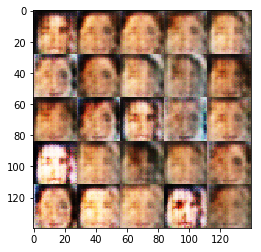

Epoch 1/1... Batch 1010... Discriminator Loss: 0.7118... Generator Loss: 2.1751
Epoch 1/1... Batch 1020... Discriminator Loss: 1.0589... Generator Loss: 0.9486
Epoch 1/1... Batch 1030... Discriminator Loss: 2.0249... Generator Loss: 0.3470
Epoch 1/1... Batch 1040... Discriminator Loss: 0.8603... Generator Loss: 1.7539
Epoch 1/1... Batch 1050... Discriminator Loss: 1.1536... Generator Loss: 0.9738
Epoch 1/1... Batch 1060... Discriminator Loss: 0.8252... Generator Loss: 2.3519
Epoch 1/1... Batch 1070... Discriminator Loss: 0.8233... Generator Loss: 2.0347
Epoch 1/1... Batch 1080... Discriminator Loss: 0.8214... Generator Loss: 1.6990
Epoch 1/1... Batch 1090... Discriminator Loss: 0.6558... Generator Loss: 1.9937
Epoch 1/1... Batch 1100... Discriminator Loss: 1.0635... Generator Loss: 1.2250


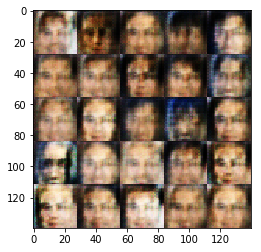

Epoch 1/1... Batch 1110... Discriminator Loss: 1.0324... Generator Loss: 1.0102
Epoch 1/1... Batch 1120... Discriminator Loss: 0.7160... Generator Loss: 1.7267
Epoch 1/1... Batch 1130... Discriminator Loss: 1.0781... Generator Loss: 0.8796
Epoch 1/1... Batch 1140... Discriminator Loss: 1.1305... Generator Loss: 1.7246
Epoch 1/1... Batch 1150... Discriminator Loss: 0.7453... Generator Loss: 2.4594
Epoch 1/1... Batch 1160... Discriminator Loss: 1.0815... Generator Loss: 0.8032
Epoch 1/1... Batch 1170... Discriminator Loss: 0.6769... Generator Loss: 2.4033
Epoch 1/1... Batch 1180... Discriminator Loss: 1.0308... Generator Loss: 1.0183
Epoch 1/1... Batch 1190... Discriminator Loss: 1.2029... Generator Loss: 1.4992
Epoch 1/1... Batch 1200... Discriminator Loss: 0.8491... Generator Loss: 1.7987


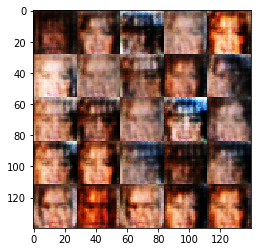

Epoch 1/1... Batch 1210... Discriminator Loss: 1.0501... Generator Loss: 1.2306
Epoch 1/1... Batch 1220... Discriminator Loss: 1.0109... Generator Loss: 1.4997
Epoch 1/1... Batch 1230... Discriminator Loss: 0.7963... Generator Loss: 1.4816
Epoch 1/1... Batch 1240... Discriminator Loss: 0.7376... Generator Loss: 1.7884
Epoch 1/1... Batch 1250... Discriminator Loss: 0.9974... Generator Loss: 1.0720
Epoch 1/1... Batch 1260... Discriminator Loss: 0.9397... Generator Loss: 1.1840
Epoch 1/1... Batch 1270... Discriminator Loss: 0.9053... Generator Loss: 1.5974
Epoch 1/1... Batch 1280... Discriminator Loss: 1.2973... Generator Loss: 0.7405
Epoch 1/1... Batch 1290... Discriminator Loss: 1.0286... Generator Loss: 1.1548
Epoch 1/1... Batch 1300... Discriminator Loss: 0.9502... Generator Loss: 1.0587


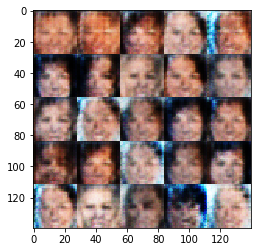

Epoch 1/1... Batch 1310... Discriminator Loss: 1.1675... Generator Loss: 0.9920
Epoch 1/1... Batch 1320... Discriminator Loss: 0.9146... Generator Loss: 1.5065
Epoch 1/1... Batch 1330... Discriminator Loss: 1.4960... Generator Loss: 0.5080
Epoch 1/1... Batch 1340... Discriminator Loss: 1.0511... Generator Loss: 0.9767
Epoch 1/1... Batch 1350... Discriminator Loss: 1.0184... Generator Loss: 1.0286
Epoch 1/1... Batch 1360... Discriminator Loss: 0.8921... Generator Loss: 1.1014
Epoch 1/1... Batch 1370... Discriminator Loss: 0.9740... Generator Loss: 1.2470
Epoch 1/1... Batch 1380... Discriminator Loss: 0.8346... Generator Loss: 1.4359
Epoch 1/1... Batch 1390... Discriminator Loss: 0.8786... Generator Loss: 1.3588
Epoch 1/1... Batch 1400... Discriminator Loss: 0.8438... Generator Loss: 2.0530


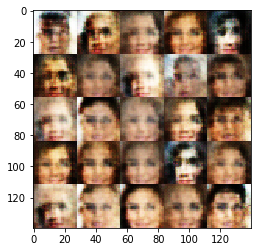

Epoch 1/1... Batch 1410... Discriminator Loss: 0.8984... Generator Loss: 1.3336
Epoch 1/1... Batch 1420... Discriminator Loss: 0.9240... Generator Loss: 1.5933
Epoch 1/1... Batch 1430... Discriminator Loss: 0.8936... Generator Loss: 1.3184
Epoch 1/1... Batch 1440... Discriminator Loss: 0.8361... Generator Loss: 1.5913
Epoch 1/1... Batch 1450... Discriminator Loss: 0.8966... Generator Loss: 1.3497
Epoch 1/1... Batch 1460... Discriminator Loss: 1.2641... Generator Loss: 0.6096
Epoch 1/1... Batch 1470... Discriminator Loss: 1.0792... Generator Loss: 1.0484
Epoch 1/1... Batch 1480... Discriminator Loss: 1.0664... Generator Loss: 1.4629
Epoch 1/1... Batch 1490... Discriminator Loss: 1.0474... Generator Loss: 0.9437
Epoch 1/1... Batch 1500... Discriminator Loss: 0.8466... Generator Loss: 1.4138


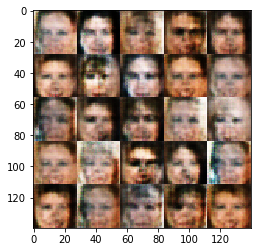

Epoch 1/1... Batch 1510... Discriminator Loss: 1.3090... Generator Loss: 1.7426
Epoch 1/1... Batch 1520... Discriminator Loss: 1.1516... Generator Loss: 0.9640
Epoch 1/1... Batch 1530... Discriminator Loss: 1.0114... Generator Loss: 0.9421
Epoch 1/1... Batch 1540... Discriminator Loss: 0.9412... Generator Loss: 1.3610
Epoch 1/1... Batch 1550... Discriminator Loss: 0.8725... Generator Loss: 1.2781
Epoch 1/1... Batch 1560... Discriminator Loss: 0.8783... Generator Loss: 1.3618
Epoch 1/1... Batch 1570... Discriminator Loss: 1.0906... Generator Loss: 0.9710
Epoch 1/1... Batch 1580... Discriminator Loss: 1.1416... Generator Loss: 0.8208
Epoch 1/1... Batch 1590... Discriminator Loss: 1.1410... Generator Loss: 0.9397
Epoch 1/1... Batch 1600... Discriminator Loss: 1.3064... Generator Loss: 0.6573


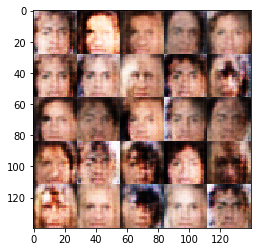

Epoch 1/1... Batch 1610... Discriminator Loss: 0.8832... Generator Loss: 1.6215
Epoch 1/1... Batch 1620... Discriminator Loss: 0.8617... Generator Loss: 1.7857
Epoch 1/1... Batch 1630... Discriminator Loss: 0.8782... Generator Loss: 1.2107
Epoch 1/1... Batch 1640... Discriminator Loss: 0.9937... Generator Loss: 0.9788
Epoch 1/1... Batch 1650... Discriminator Loss: 1.0310... Generator Loss: 1.1701
Epoch 1/1... Batch 1660... Discriminator Loss: 0.8846... Generator Loss: 1.8410
Epoch 1/1... Batch 1670... Discriminator Loss: 1.0235... Generator Loss: 1.1272
Epoch 1/1... Batch 1680... Discriminator Loss: 0.9206... Generator Loss: 1.6669
Epoch 1/1... Batch 1690... Discriminator Loss: 0.7676... Generator Loss: 1.3642
Epoch 1/1... Batch 1700... Discriminator Loss: 0.8804... Generator Loss: 1.2649


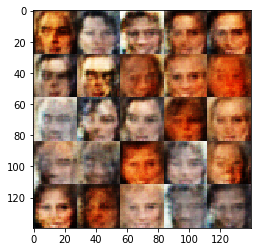

Epoch 1/1... Batch 1710... Discriminator Loss: 1.0976... Generator Loss: 2.3183
Epoch 1/1... Batch 1720... Discriminator Loss: 1.1135... Generator Loss: 0.9601
Epoch 1/1... Batch 1730... Discriminator Loss: 0.8407... Generator Loss: 2.0898
Epoch 1/1... Batch 1740... Discriminator Loss: 1.1956... Generator Loss: 0.9107
Epoch 1/1... Batch 1750... Discriminator Loss: 0.7238... Generator Loss: 1.5631
Epoch 1/1... Batch 1760... Discriminator Loss: 1.0468... Generator Loss: 2.5844
Epoch 1/1... Batch 1770... Discriminator Loss: 0.9851... Generator Loss: 1.2689
Epoch 1/1... Batch 1780... Discriminator Loss: 1.1311... Generator Loss: 1.0212
Epoch 1/1... Batch 1790... Discriminator Loss: 0.9403... Generator Loss: 1.3741
Epoch 1/1... Batch 1800... Discriminator Loss: 0.8042... Generator Loss: 1.4883


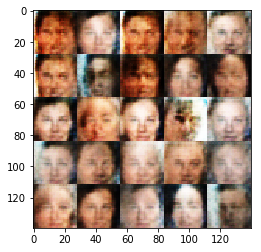

Epoch 1/1... Batch 1810... Discriminator Loss: 0.9658... Generator Loss: 1.5760
Epoch 1/1... Batch 1820... Discriminator Loss: 0.8572... Generator Loss: 1.3186
Epoch 1/1... Batch 1830... Discriminator Loss: 1.0934... Generator Loss: 0.9982
Epoch 1/1... Batch 1840... Discriminator Loss: 1.0950... Generator Loss: 1.2071
Epoch 1/1... Batch 1850... Discriminator Loss: 1.5164... Generator Loss: 0.5252
Epoch 1/1... Batch 1860... Discriminator Loss: 0.8326... Generator Loss: 1.2613
Epoch 1/1... Batch 1870... Discriminator Loss: 0.9005... Generator Loss: 1.2722
Epoch 1/1... Batch 1880... Discriminator Loss: 0.9755... Generator Loss: 1.1864
Epoch 1/1... Batch 1890... Discriminator Loss: 1.0907... Generator Loss: 1.0982
Epoch 1/1... Batch 1900... Discriminator Loss: 1.0982... Generator Loss: 0.9848


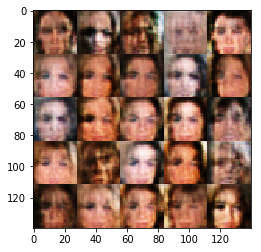

Epoch 1/1... Batch 1910... Discriminator Loss: 0.8510... Generator Loss: 1.4081
Epoch 1/1... Batch 1920... Discriminator Loss: 1.0050... Generator Loss: 1.1998
Epoch 1/1... Batch 1930... Discriminator Loss: 0.9713... Generator Loss: 1.0218
Epoch 1/1... Batch 1940... Discriminator Loss: 1.0214... Generator Loss: 1.1437
Epoch 1/1... Batch 1950... Discriminator Loss: 0.9227... Generator Loss: 1.9675
Epoch 1/1... Batch 1960... Discriminator Loss: 1.9184... Generator Loss: 0.2930
Epoch 1/1... Batch 1970... Discriminator Loss: 0.9937... Generator Loss: 1.4005
Epoch 1/1... Batch 1980... Discriminator Loss: 0.9587... Generator Loss: 1.2957
Epoch 1/1... Batch 1990... Discriminator Loss: 1.0737... Generator Loss: 1.5363
Epoch 1/1... Batch 2000... Discriminator Loss: 0.8391... Generator Loss: 1.7913


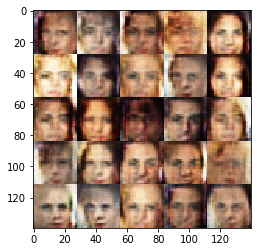

Epoch 1/1... Batch 2010... Discriminator Loss: 0.8712... Generator Loss: 1.3185
Epoch 1/1... Batch 2020... Discriminator Loss: 0.9176... Generator Loss: 1.3252
Epoch 1/1... Batch 2030... Discriminator Loss: 1.0147... Generator Loss: 1.1826
Epoch 1/1... Batch 2040... Discriminator Loss: 0.9230... Generator Loss: 1.3131
Epoch 1/1... Batch 2050... Discriminator Loss: 1.1914... Generator Loss: 0.6753
Epoch 1/1... Batch 2060... Discriminator Loss: 0.7827... Generator Loss: 1.6399
Epoch 1/1... Batch 2070... Discriminator Loss: 0.8896... Generator Loss: 1.6641
Epoch 1/1... Batch 2080... Discriminator Loss: 0.8709... Generator Loss: 1.4295
Epoch 1/1... Batch 2090... Discriminator Loss: 1.0077... Generator Loss: 1.1498
Epoch 1/1... Batch 2100... Discriminator Loss: 0.9127... Generator Loss: 1.4570


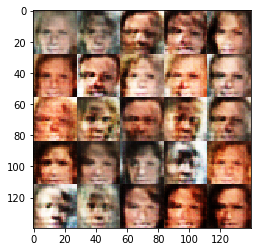

Epoch 1/1... Batch 2110... Discriminator Loss: 0.8321... Generator Loss: 1.7270
Epoch 1/1... Batch 2120... Discriminator Loss: 0.9618... Generator Loss: 1.1110
Epoch 1/1... Batch 2130... Discriminator Loss: 0.9770... Generator Loss: 1.0849
Epoch 1/1... Batch 2140... Discriminator Loss: 1.1799... Generator Loss: 0.9227
Epoch 1/1... Batch 2150... Discriminator Loss: 0.9422... Generator Loss: 1.8898
Epoch 1/1... Batch 2160... Discriminator Loss: 0.9524... Generator Loss: 1.5290
Epoch 1/1... Batch 2170... Discriminator Loss: 1.1289... Generator Loss: 0.7714
Epoch 1/1... Batch 2180... Discriminator Loss: 1.0168... Generator Loss: 1.0782
Epoch 1/1... Batch 2190... Discriminator Loss: 0.9573... Generator Loss: 1.1140
Epoch 1/1... Batch 2200... Discriminator Loss: 1.1049... Generator Loss: 1.0927


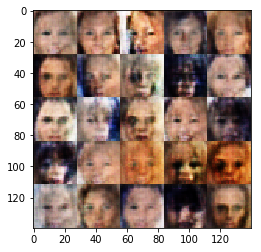

Epoch 1/1... Batch 2210... Discriminator Loss: 1.0369... Generator Loss: 1.4437
Epoch 1/1... Batch 2220... Discriminator Loss: 0.9264... Generator Loss: 1.2718
Epoch 1/1... Batch 2230... Discriminator Loss: 1.0007... Generator Loss: 1.1241
Epoch 1/1... Batch 2240... Discriminator Loss: 0.8687... Generator Loss: 1.9800
Epoch 1/1... Batch 2250... Discriminator Loss: 1.1178... Generator Loss: 0.8284
Epoch 1/1... Batch 2260... Discriminator Loss: 0.8808... Generator Loss: 1.4441
Epoch 1/1... Batch 2270... Discriminator Loss: 0.8707... Generator Loss: 1.5946
Epoch 1/1... Batch 2280... Discriminator Loss: 0.8189... Generator Loss: 1.3955
Epoch 1/1... Batch 2290... Discriminator Loss: 1.2649... Generator Loss: 2.0867
Epoch 1/1... Batch 2300... Discriminator Loss: 0.9333... Generator Loss: 1.1581


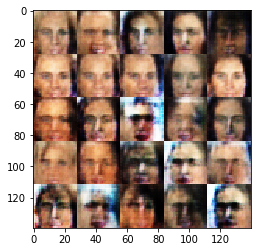

Epoch 1/1... Batch 2310... Discriminator Loss: 0.9166... Generator Loss: 1.4896
Epoch 1/1... Batch 2320... Discriminator Loss: 0.8875... Generator Loss: 1.2692
Epoch 1/1... Batch 2330... Discriminator Loss: 1.1943... Generator Loss: 0.7734
Epoch 1/1... Batch 2340... Discriminator Loss: 0.9561... Generator Loss: 1.1158
Epoch 1/1... Batch 2350... Discriminator Loss: 1.1613... Generator Loss: 0.8878
Epoch 1/1... Batch 2360... Discriminator Loss: 1.0767... Generator Loss: 1.0607
Epoch 1/1... Batch 2370... Discriminator Loss: 0.8981... Generator Loss: 1.4554
Epoch 1/1... Batch 2380... Discriminator Loss: 1.0324... Generator Loss: 1.1603
Epoch 1/1... Batch 2390... Discriminator Loss: 0.9088... Generator Loss: 1.1455
Epoch 1/1... Batch 2400... Discriminator Loss: 1.1075... Generator Loss: 1.0319


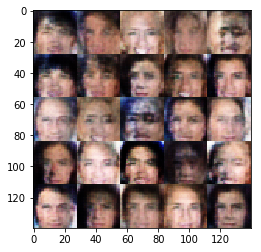

Epoch 1/1... Batch 2410... Discriminator Loss: 1.1031... Generator Loss: 0.8325
Epoch 1/1... Batch 2420... Discriminator Loss: 1.0308... Generator Loss: 1.0902
Epoch 1/1... Batch 2430... Discriminator Loss: 0.9552... Generator Loss: 1.4281
Epoch 1/1... Batch 2440... Discriminator Loss: 0.9974... Generator Loss: 1.1346
Epoch 1/1... Batch 2450... Discriminator Loss: 0.9348... Generator Loss: 1.1726
Epoch 1/1... Batch 2460... Discriminator Loss: 0.9891... Generator Loss: 1.1064
Epoch 1/1... Batch 2470... Discriminator Loss: 0.9004... Generator Loss: 1.2093
Epoch 1/1... Batch 2480... Discriminator Loss: 0.9721... Generator Loss: 1.0325
Epoch 1/1... Batch 2490... Discriminator Loss: 0.9043... Generator Loss: 1.5804
Epoch 1/1... Batch 2500... Discriminator Loss: 0.8357... Generator Loss: 1.8937


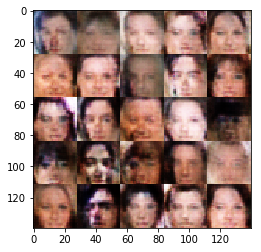

Epoch 1/1... Batch 2510... Discriminator Loss: 0.9691... Generator Loss: 2.2030
Epoch 1/1... Batch 2520... Discriminator Loss: 1.1169... Generator Loss: 1.1290
Epoch 1/1... Batch 2530... Discriminator Loss: 0.9248... Generator Loss: 1.3738
Epoch 1/1... Batch 2540... Discriminator Loss: 0.8852... Generator Loss: 1.3118
Epoch 1/1... Batch 2550... Discriminator Loss: 1.1222... Generator Loss: 0.9054
Epoch 1/1... Batch 2560... Discriminator Loss: 0.9296... Generator Loss: 1.2881
Epoch 1/1... Batch 2570... Discriminator Loss: 0.8916... Generator Loss: 1.6369
Epoch 1/1... Batch 2580... Discriminator Loss: 1.0935... Generator Loss: 0.9508
Epoch 1/1... Batch 2590... Discriminator Loss: 1.3021... Generator Loss: 0.6071
Epoch 1/1... Batch 2600... Discriminator Loss: 1.0513... Generator Loss: 1.1384


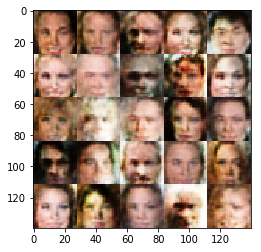

Epoch 1/1... Batch 2610... Discriminator Loss: 0.7635... Generator Loss: 1.5598
Epoch 1/1... Batch 2620... Discriminator Loss: 0.9408... Generator Loss: 1.2532
Epoch 1/1... Batch 2630... Discriminator Loss: 1.1229... Generator Loss: 1.3805
Epoch 1/1... Batch 2640... Discriminator Loss: 1.2066... Generator Loss: 0.8738
Epoch 1/1... Batch 2650... Discriminator Loss: 1.1345... Generator Loss: 0.7556
Epoch 1/1... Batch 2660... Discriminator Loss: 0.8678... Generator Loss: 1.6550
Epoch 1/1... Batch 2670... Discriminator Loss: 1.1606... Generator Loss: 0.7352
Epoch 1/1... Batch 2680... Discriminator Loss: 0.8934... Generator Loss: 1.1150
Epoch 1/1... Batch 2690... Discriminator Loss: 0.9161... Generator Loss: 1.4400
Epoch 1/1... Batch 2700... Discriminator Loss: 0.8210... Generator Loss: 1.6880


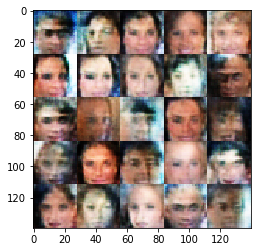

Epoch 1/1... Batch 2710... Discriminator Loss: 0.8936... Generator Loss: 1.3559
Epoch 1/1... Batch 2720... Discriminator Loss: 1.0607... Generator Loss: 1.4276
Epoch 1/1... Batch 2730... Discriminator Loss: 0.8921... Generator Loss: 1.2218
Epoch 1/1... Batch 2740... Discriminator Loss: 0.8112... Generator Loss: 1.5907
Epoch 1/1... Batch 2750... Discriminator Loss: 1.0106... Generator Loss: 1.4928
Epoch 1/1... Batch 2760... Discriminator Loss: 0.8295... Generator Loss: 1.3404
Epoch 1/1... Batch 2770... Discriminator Loss: 0.9398... Generator Loss: 1.2271
Epoch 1/1... Batch 2780... Discriminator Loss: 1.0726... Generator Loss: 1.4766
Epoch 1/1... Batch 2790... Discriminator Loss: 1.0765... Generator Loss: 0.9333
Epoch 1/1... Batch 2800... Discriminator Loss: 1.0866... Generator Loss: 0.8970


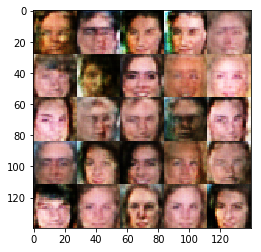

Epoch 1/1... Batch 2810... Discriminator Loss: 0.9602... Generator Loss: 1.3287
Epoch 1/1... Batch 2820... Discriminator Loss: 1.0035... Generator Loss: 1.3006
Epoch 1/1... Batch 2830... Discriminator Loss: 0.7603... Generator Loss: 1.6356
Epoch 1/1... Batch 2840... Discriminator Loss: 1.0664... Generator Loss: 1.1394
Epoch 1/1... Batch 2850... Discriminator Loss: 1.0943... Generator Loss: 0.7996
Epoch 1/1... Batch 2860... Discriminator Loss: 1.1476... Generator Loss: 0.7576
Epoch 1/1... Batch 2870... Discriminator Loss: 0.7663... Generator Loss: 1.7631
Epoch 1/1... Batch 2880... Discriminator Loss: 1.0621... Generator Loss: 0.8546
Epoch 1/1... Batch 2890... Discriminator Loss: 0.9019... Generator Loss: 1.6804
Epoch 1/1... Batch 2900... Discriminator Loss: 0.9587... Generator Loss: 1.0428


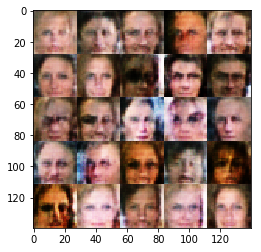

Epoch 1/1... Batch 2910... Discriminator Loss: 0.9567... Generator Loss: 1.4253
Epoch 1/1... Batch 2920... Discriminator Loss: 1.1268... Generator Loss: 1.2080
Epoch 1/1... Batch 2930... Discriminator Loss: 0.9196... Generator Loss: 1.5191
Epoch 1/1... Batch 2940... Discriminator Loss: 0.9407... Generator Loss: 1.1285
Epoch 1/1... Batch 2950... Discriminator Loss: 1.0847... Generator Loss: 1.0776
Epoch 1/1... Batch 2960... Discriminator Loss: 1.0638... Generator Loss: 0.9739
Epoch 1/1... Batch 2970... Discriminator Loss: 0.9778... Generator Loss: 1.2278
Epoch 1/1... Batch 2980... Discriminator Loss: 0.9695... Generator Loss: 1.0649
Epoch 1/1... Batch 2990... Discriminator Loss: 0.9914... Generator Loss: 0.9570
Epoch 1/1... Batch 3000... Discriminator Loss: 1.0685... Generator Loss: 0.9605


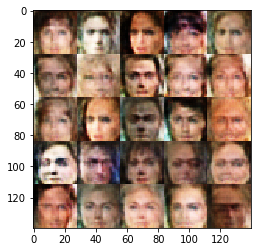

Epoch 1/1... Batch 3010... Discriminator Loss: 0.8718... Generator Loss: 1.1188
Epoch 1/1... Batch 3020... Discriminator Loss: 1.0625... Generator Loss: 0.9194
Epoch 1/1... Batch 3030... Discriminator Loss: 1.0456... Generator Loss: 0.9904
Epoch 1/1... Batch 3040... Discriminator Loss: 0.9421... Generator Loss: 1.1564
Epoch 1/1... Batch 3050... Discriminator Loss: 1.1804... Generator Loss: 1.3149
Epoch 1/1... Batch 3060... Discriminator Loss: 0.9756... Generator Loss: 1.3603
Epoch 1/1... Batch 3070... Discriminator Loss: 1.4243... Generator Loss: 0.4947
Epoch 1/1... Batch 3080... Discriminator Loss: 1.3325... Generator Loss: 0.7382
Epoch 1/1... Batch 3090... Discriminator Loss: 1.1691... Generator Loss: 0.8301
Epoch 1/1... Batch 3100... Discriminator Loss: 0.9237... Generator Loss: 1.3512


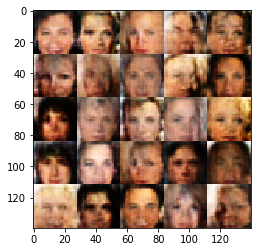

Epoch 1/1... Batch 3110... Discriminator Loss: 1.3409... Generator Loss: 0.7173
Epoch 1/1... Batch 3120... Discriminator Loss: 0.9303... Generator Loss: 1.2783
Epoch 1/1... Batch 3130... Discriminator Loss: 0.8587... Generator Loss: 1.5526
Epoch 1/1... Batch 3140... Discriminator Loss: 1.1821... Generator Loss: 0.9259
Epoch 1/1... Batch 3150... Discriminator Loss: 1.0611... Generator Loss: 0.9951
Epoch 1/1... Batch 3160... Discriminator Loss: 0.8600... Generator Loss: 1.3838
Epoch 1/1... Batch 3170... Discriminator Loss: 0.9637... Generator Loss: 1.2011
Epoch 1/1... Batch 3180... Discriminator Loss: 1.0977... Generator Loss: 1.4369
Epoch 1/1... Batch 3190... Discriminator Loss: 0.9023... Generator Loss: 1.1483
Epoch 1/1... Batch 3200... Discriminator Loss: 1.2424... Generator Loss: 1.3265


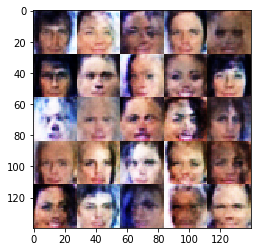

Epoch 1/1... Batch 3210... Discriminator Loss: 1.0633... Generator Loss: 1.0008
Epoch 1/1... Batch 3220... Discriminator Loss: 0.9738... Generator Loss: 1.2418
Epoch 1/1... Batch 3230... Discriminator Loss: 1.1156... Generator Loss: 1.1971
Epoch 1/1... Batch 3240... Discriminator Loss: 1.0062... Generator Loss: 1.4826
Epoch 1/1... Batch 3250... Discriminator Loss: 1.0837... Generator Loss: 1.0702
Epoch 1/1... Batch 3260... Discriminator Loss: 1.1644... Generator Loss: 1.4952
Epoch 1/1... Batch 3270... Discriminator Loss: 1.0509... Generator Loss: 1.1590
Epoch 1/1... Batch 3280... Discriminator Loss: 1.0476... Generator Loss: 1.1135
Epoch 1/1... Batch 3290... Discriminator Loss: 0.9512... Generator Loss: 1.5127
Epoch 1/1... Batch 3300... Discriminator Loss: 1.1416... Generator Loss: 0.8524


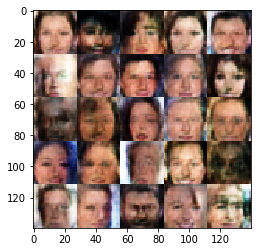

Epoch 1/1... Batch 3310... Discriminator Loss: 1.0099... Generator Loss: 1.2778
Epoch 1/1... Batch 3320... Discriminator Loss: 1.0671... Generator Loss: 1.0972
Epoch 1/1... Batch 3330... Discriminator Loss: 0.9342... Generator Loss: 1.8218
Epoch 1/1... Batch 3340... Discriminator Loss: 0.9719... Generator Loss: 1.2694
Epoch 1/1... Batch 3350... Discriminator Loss: 0.9335... Generator Loss: 1.6028
Epoch 1/1... Batch 3360... Discriminator Loss: 1.0737... Generator Loss: 0.8874
Epoch 1/1... Batch 3370... Discriminator Loss: 1.0030... Generator Loss: 1.3733
Epoch 1/1... Batch 3380... Discriminator Loss: 1.2375... Generator Loss: 0.7184
Epoch 1/1... Batch 3390... Discriminator Loss: 1.0127... Generator Loss: 1.2481
Epoch 1/1... Batch 3400... Discriminator Loss: 1.0159... Generator Loss: 1.1553


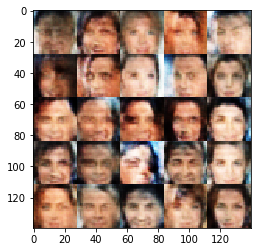

Epoch 1/1... Batch 3410... Discriminator Loss: 1.1709... Generator Loss: 1.1286
Epoch 1/1... Batch 3420... Discriminator Loss: 1.0010... Generator Loss: 1.1541
Epoch 1/1... Batch 3430... Discriminator Loss: 0.8934... Generator Loss: 1.0902
Epoch 1/1... Batch 3440... Discriminator Loss: 1.1161... Generator Loss: 1.9470
Epoch 1/1... Batch 3450... Discriminator Loss: 0.8687... Generator Loss: 1.7149
Epoch 1/1... Batch 3460... Discriminator Loss: 1.0440... Generator Loss: 1.0216
Epoch 1/1... Batch 3470... Discriminator Loss: 0.9437... Generator Loss: 1.2634
Epoch 1/1... Batch 3480... Discriminator Loss: 1.2692... Generator Loss: 1.1009
Epoch 1/1... Batch 3490... Discriminator Loss: 1.1418... Generator Loss: 1.7342
Epoch 1/1... Batch 3500... Discriminator Loss: 1.1394... Generator Loss: 1.9055


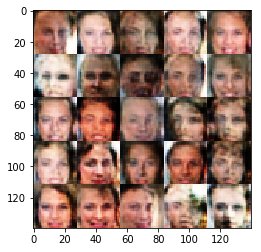

Epoch 1/1... Batch 3510... Discriminator Loss: 1.1455... Generator Loss: 0.8531
Epoch 1/1... Batch 3520... Discriminator Loss: 1.1770... Generator Loss: 0.7318
Epoch 1/1... Batch 3530... Discriminator Loss: 1.0293... Generator Loss: 1.3031
Epoch 1/1... Batch 3540... Discriminator Loss: 1.0961... Generator Loss: 0.9817
Epoch 1/1... Batch 3550... Discriminator Loss: 0.9416... Generator Loss: 1.5761
Epoch 1/1... Batch 3560... Discriminator Loss: 1.1295... Generator Loss: 2.1242
Epoch 1/1... Batch 3570... Discriminator Loss: 1.0448... Generator Loss: 1.2004
Epoch 1/1... Batch 3580... Discriminator Loss: 1.3422... Generator Loss: 0.7276
Epoch 1/1... Batch 3590... Discriminator Loss: 0.9663... Generator Loss: 1.2314
Epoch 1/1... Batch 3600... Discriminator Loss: 0.9836... Generator Loss: 1.0050


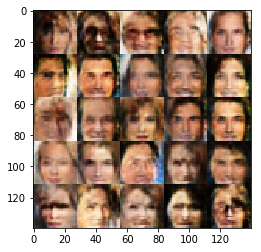

Epoch 1/1... Batch 3610... Discriminator Loss: 1.3385... Generator Loss: 0.6180
Epoch 1/1... Batch 3620... Discriminator Loss: 1.0591... Generator Loss: 0.9094
Epoch 1/1... Batch 3630... Discriminator Loss: 1.1988... Generator Loss: 0.6685
Epoch 1/1... Batch 3640... Discriminator Loss: 0.8724... Generator Loss: 1.2922
Epoch 1/1... Batch 3650... Discriminator Loss: 1.0157... Generator Loss: 1.3393
Epoch 1/1... Batch 3660... Discriminator Loss: 0.9005... Generator Loss: 1.4270
Epoch 1/1... Batch 3670... Discriminator Loss: 1.0895... Generator Loss: 0.9686
Epoch 1/1... Batch 3680... Discriminator Loss: 0.7540... Generator Loss: 1.4391
Epoch 1/1... Batch 3690... Discriminator Loss: 0.9559... Generator Loss: 1.2003
Epoch 1/1... Batch 3700... Discriminator Loss: 1.0291... Generator Loss: 1.2819


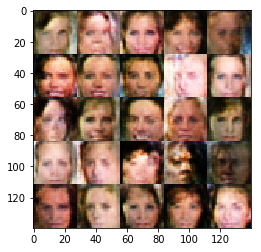

Epoch 1/1... Batch 3710... Discriminator Loss: 0.9947... Generator Loss: 1.2918
Epoch 1/1... Batch 3720... Discriminator Loss: 0.9082... Generator Loss: 1.1994
Epoch 1/1... Batch 3730... Discriminator Loss: 0.9933... Generator Loss: 1.2770
Epoch 1/1... Batch 3740... Discriminator Loss: 1.1321... Generator Loss: 0.9402
Epoch 1/1... Batch 3750... Discriminator Loss: 1.0289... Generator Loss: 1.4368
Epoch 1/1... Batch 3760... Discriminator Loss: 1.0635... Generator Loss: 1.3466
Epoch 1/1... Batch 3770... Discriminator Loss: 1.1344... Generator Loss: 0.8980
Epoch 1/1... Batch 3780... Discriminator Loss: 1.0782... Generator Loss: 0.9166
Epoch 1/1... Batch 3790... Discriminator Loss: 1.0953... Generator Loss: 1.3938
Epoch 1/1... Batch 3800... Discriminator Loss: 0.9609... Generator Loss: 1.0767


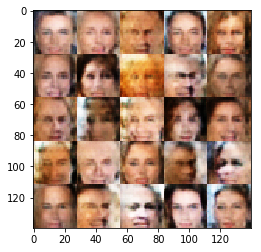

Epoch 1/1... Batch 3810... Discriminator Loss: 1.0539... Generator Loss: 0.8611
Epoch 1/1... Batch 3820... Discriminator Loss: 1.0146... Generator Loss: 1.1754
Epoch 1/1... Batch 3830... Discriminator Loss: 1.0897... Generator Loss: 0.8189
Epoch 1/1... Batch 3840... Discriminator Loss: 1.1250... Generator Loss: 0.7999
Epoch 1/1... Batch 3850... Discriminator Loss: 0.9869... Generator Loss: 1.0262
Epoch 1/1... Batch 3860... Discriminator Loss: 1.0035... Generator Loss: 1.0701
Epoch 1/1... Batch 3870... Discriminator Loss: 0.8369... Generator Loss: 1.7639
Epoch 1/1... Batch 3880... Discriminator Loss: 1.0988... Generator Loss: 0.8137
Epoch 1/1... Batch 3890... Discriminator Loss: 1.0577... Generator Loss: 0.9886
Epoch 1/1... Batch 3900... Discriminator Loss: 1.2479... Generator Loss: 0.6937


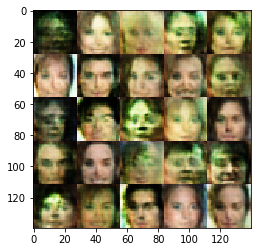

Epoch 1/1... Batch 3910... Discriminator Loss: 0.9594... Generator Loss: 1.2718
Epoch 1/1... Batch 3920... Discriminator Loss: 1.1634... Generator Loss: 0.7697
Epoch 1/1... Batch 3930... Discriminator Loss: 1.2546... Generator Loss: 0.6985
Epoch 1/1... Batch 3940... Discriminator Loss: 1.0569... Generator Loss: 1.3924
Epoch 1/1... Batch 3950... Discriminator Loss: 1.0634... Generator Loss: 1.0124
Epoch 1/1... Batch 3960... Discriminator Loss: 0.9503... Generator Loss: 1.4208
Epoch 1/1... Batch 3970... Discriminator Loss: 0.9536... Generator Loss: 1.0239
Epoch 1/1... Batch 3980... Discriminator Loss: 1.2188... Generator Loss: 0.8740
Epoch 1/1... Batch 3990... Discriminator Loss: 1.0827... Generator Loss: 0.9551
Epoch 1/1... Batch 4000... Discriminator Loss: 1.3072... Generator Loss: 0.6527


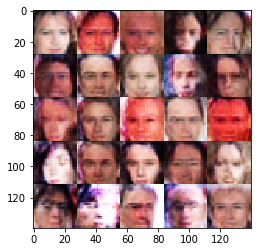

Epoch 1/1... Batch 4010... Discriminator Loss: 0.9753... Generator Loss: 1.2071
Epoch 1/1... Batch 4020... Discriminator Loss: 0.9581... Generator Loss: 0.9742
Epoch 1/1... Batch 4030... Discriminator Loss: 0.9542... Generator Loss: 1.1242
Epoch 1/1... Batch 4040... Discriminator Loss: 1.0235... Generator Loss: 0.8948
Epoch 1/1... Batch 4050... Discriminator Loss: 1.0783... Generator Loss: 0.9574
Epoch 1/1... Batch 4060... Discriminator Loss: 0.8513... Generator Loss: 1.2692
Epoch 1/1... Batch 4070... Discriminator Loss: 1.0801... Generator Loss: 0.9082
Epoch 1/1... Batch 4080... Discriminator Loss: 0.9322... Generator Loss: 1.5451
Epoch 1/1... Batch 4090... Discriminator Loss: 0.9450... Generator Loss: 1.3446
Epoch 1/1... Batch 4100... Discriminator Loss: 0.9534... Generator Loss: 1.3220


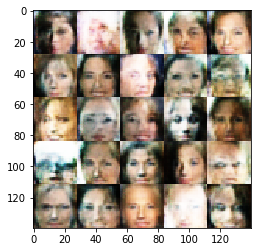

Epoch 1/1... Batch 4110... Discriminator Loss: 1.3222... Generator Loss: 0.5563
Epoch 1/1... Batch 4120... Discriminator Loss: 1.1302... Generator Loss: 0.7846
Epoch 1/1... Batch 4130... Discriminator Loss: 1.0471... Generator Loss: 0.9373
Epoch 1/1... Batch 4140... Discriminator Loss: 1.1317... Generator Loss: 0.9474
Epoch 1/1... Batch 4150... Discriminator Loss: 1.0313... Generator Loss: 0.9735
Epoch 1/1... Batch 4160... Discriminator Loss: 0.9945... Generator Loss: 0.9672
Epoch 1/1... Batch 4170... Discriminator Loss: 0.9950... Generator Loss: 1.0703
Epoch 1/1... Batch 4180... Discriminator Loss: 1.0615... Generator Loss: 0.8891
Epoch 1/1... Batch 4190... Discriminator Loss: 1.2304... Generator Loss: 0.6992
Epoch 1/1... Batch 4200... Discriminator Loss: 1.1375... Generator Loss: 1.0304


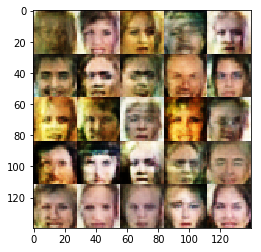

Epoch 1/1... Batch 4210... Discriminator Loss: 1.0379... Generator Loss: 0.8355
Epoch 1/1... Batch 4220... Discriminator Loss: 0.9431... Generator Loss: 1.5573
Epoch 1/1... Batch 4230... Discriminator Loss: 1.1398... Generator Loss: 0.7354
Epoch 1/1... Batch 4240... Discriminator Loss: 1.0567... Generator Loss: 1.0188
Epoch 1/1... Batch 4250... Discriminator Loss: 1.0580... Generator Loss: 0.8074
Epoch 1/1... Batch 4260... Discriminator Loss: 0.8799... Generator Loss: 1.6029
Epoch 1/1... Batch 4270... Discriminator Loss: 1.0477... Generator Loss: 0.8361
Epoch 1/1... Batch 4280... Discriminator Loss: 0.9745... Generator Loss: 1.3536
Epoch 1/1... Batch 4290... Discriminator Loss: 0.9015... Generator Loss: 1.1649
Epoch 1/1... Batch 4300... Discriminator Loss: 1.1008... Generator Loss: 0.8185


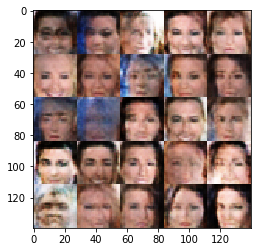

Epoch 1/1... Batch 4310... Discriminator Loss: 1.0825... Generator Loss: 0.9556
Epoch 1/1... Batch 4320... Discriminator Loss: 1.1485... Generator Loss: 0.8622
Epoch 1/1... Batch 4330... Discriminator Loss: 1.0219... Generator Loss: 1.5672
Epoch 1/1... Batch 4340... Discriminator Loss: 1.3256... Generator Loss: 2.0880
Epoch 1/1... Batch 4350... Discriminator Loss: 1.2372... Generator Loss: 1.1282
Epoch 1/1... Batch 4360... Discriminator Loss: 1.2722... Generator Loss: 0.7441
Epoch 1/1... Batch 4370... Discriminator Loss: 1.0644... Generator Loss: 0.9867
Epoch 1/1... Batch 4380... Discriminator Loss: 1.0575... Generator Loss: 0.9631
Epoch 1/1... Batch 4390... Discriminator Loss: 0.8487... Generator Loss: 2.1468
Epoch 1/1... Batch 4400... Discriminator Loss: 1.0046... Generator Loss: 0.9920


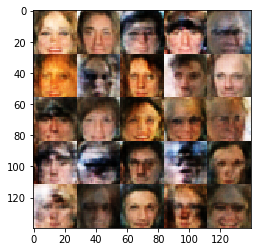

Epoch 1/1... Batch 4410... Discriminator Loss: 1.0758... Generator Loss: 0.8892
Epoch 1/1... Batch 4420... Discriminator Loss: 1.0943... Generator Loss: 1.0557
Epoch 1/1... Batch 4430... Discriminator Loss: 1.1644... Generator Loss: 0.8691
Epoch 1/1... Batch 4440... Discriminator Loss: 1.0934... Generator Loss: 0.8819
Epoch 1/1... Batch 4450... Discriminator Loss: 0.9092... Generator Loss: 1.8200
Epoch 1/1... Batch 4460... Discriminator Loss: 0.9839... Generator Loss: 1.0285
Epoch 1/1... Batch 4470... Discriminator Loss: 0.9842... Generator Loss: 1.3302
Epoch 1/1... Batch 4480... Discriminator Loss: 1.0079... Generator Loss: 1.1772
Epoch 1/1... Batch 4490... Discriminator Loss: 1.0043... Generator Loss: 0.9479
Epoch 1/1... Batch 4500... Discriminator Loss: 1.2428... Generator Loss: 0.9310


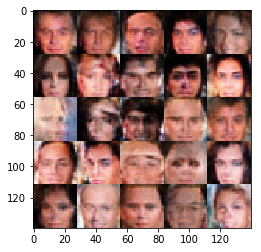

Epoch 1/1... Batch 4510... Discriminator Loss: 1.0546... Generator Loss: 0.8902
Epoch 1/1... Batch 4520... Discriminator Loss: 1.0539... Generator Loss: 1.0996
Epoch 1/1... Batch 4530... Discriminator Loss: 1.0680... Generator Loss: 0.9887
Epoch 1/1... Batch 4540... Discriminator Loss: 1.0665... Generator Loss: 0.9515
Epoch 1/1... Batch 4550... Discriminator Loss: 1.0928... Generator Loss: 1.4326
Epoch 1/1... Batch 4560... Discriminator Loss: 0.9973... Generator Loss: 1.1174
Epoch 1/1... Batch 4570... Discriminator Loss: 1.1821... Generator Loss: 0.7587
Epoch 1/1... Batch 4580... Discriminator Loss: 1.3305... Generator Loss: 0.7826
Epoch 1/1... Batch 4590... Discriminator Loss: 1.0068... Generator Loss: 1.1448
Epoch 1/1... Batch 4600... Discriminator Loss: 1.1635... Generator Loss: 0.9004


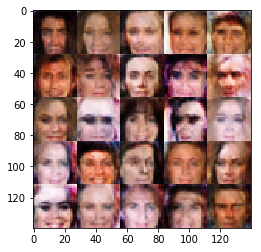

Epoch 1/1... Batch 4610... Discriminator Loss: 0.8650... Generator Loss: 1.7754
Epoch 1/1... Batch 4620... Discriminator Loss: 1.0947... Generator Loss: 0.8906
Epoch 1/1... Batch 4630... Discriminator Loss: 0.9245... Generator Loss: 1.0146
Epoch 1/1... Batch 4640... Discriminator Loss: 1.0705... Generator Loss: 0.8181
Epoch 1/1... Batch 4650... Discriminator Loss: 0.8630... Generator Loss: 1.5941
Epoch 1/1... Batch 4660... Discriminator Loss: 0.9228... Generator Loss: 1.2642
Epoch 1/1... Batch 4670... Discriminator Loss: 0.8471... Generator Loss: 1.6042
Epoch 1/1... Batch 4680... Discriminator Loss: 1.1700... Generator Loss: 0.7081
Epoch 1/1... Batch 4690... Discriminator Loss: 1.2845... Generator Loss: 0.7487
Epoch 1/1... Batch 4700... Discriminator Loss: 0.9558... Generator Loss: 0.9740


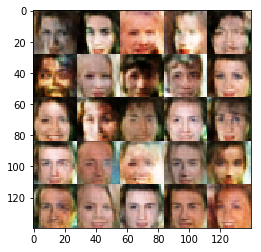

Epoch 1/1... Batch 4710... Discriminator Loss: 0.9360... Generator Loss: 1.0124
Epoch 1/1... Batch 4720... Discriminator Loss: 1.1955... Generator Loss: 0.7115
Epoch 1/1... Batch 4730... Discriminator Loss: 1.2272... Generator Loss: 0.7323
Epoch 1/1... Batch 4740... Discriminator Loss: 1.3350... Generator Loss: 0.6397
Epoch 1/1... Batch 4750... Discriminator Loss: 1.2339... Generator Loss: 0.6900
Epoch 1/1... Batch 4760... Discriminator Loss: 1.0259... Generator Loss: 1.3149
Epoch 1/1... Batch 4770... Discriminator Loss: 1.0308... Generator Loss: 1.0212
Epoch 1/1... Batch 4780... Discriminator Loss: 1.0499... Generator Loss: 1.0178
Epoch 1/1... Batch 4790... Discriminator Loss: 1.0449... Generator Loss: 0.9811
Epoch 1/1... Batch 4800... Discriminator Loss: 1.0227... Generator Loss: 1.3634


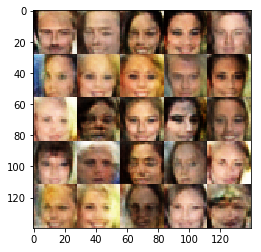

Epoch 1/1... Batch 4810... Discriminator Loss: 1.2514... Generator Loss: 0.6019
Epoch 1/1... Batch 4820... Discriminator Loss: 1.0347... Generator Loss: 0.9527
Epoch 1/1... Batch 4830... Discriminator Loss: 1.0307... Generator Loss: 1.2731
Epoch 1/1... Batch 4840... Discriminator Loss: 1.0211... Generator Loss: 1.1202
Epoch 1/1... Batch 4850... Discriminator Loss: 1.2417... Generator Loss: 0.6972
Epoch 1/1... Batch 4860... Discriminator Loss: 1.0636... Generator Loss: 0.8447
Epoch 1/1... Batch 4870... Discriminator Loss: 1.0935... Generator Loss: 0.8621
Epoch 1/1... Batch 4880... Discriminator Loss: 0.8695... Generator Loss: 1.5995
Epoch 1/1... Batch 4890... Discriminator Loss: 0.9358... Generator Loss: 1.0592
Epoch 1/1... Batch 4900... Discriminator Loss: 0.9162... Generator Loss: 1.3886


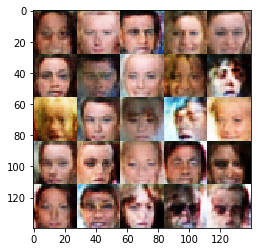

Epoch 1/1... Batch 4910... Discriminator Loss: 1.3945... Generator Loss: 0.5514
Epoch 1/1... Batch 4920... Discriminator Loss: 1.0478... Generator Loss: 0.9794
Epoch 1/1... Batch 4930... Discriminator Loss: 1.0627... Generator Loss: 0.9829
Epoch 1/1... Batch 4940... Discriminator Loss: 1.1856... Generator Loss: 0.7832
Epoch 1/1... Batch 4950... Discriminator Loss: 1.2451... Generator Loss: 0.8068
Epoch 1/1... Batch 4960... Discriminator Loss: 1.1284... Generator Loss: 0.8703
Epoch 1/1... Batch 4970... Discriminator Loss: 0.8990... Generator Loss: 1.3652
Epoch 1/1... Batch 4980... Discriminator Loss: 0.9488... Generator Loss: 1.4050
Epoch 1/1... Batch 4990... Discriminator Loss: 1.1521... Generator Loss: 0.9150
Epoch 1/1... Batch 5000... Discriminator Loss: 1.0021... Generator Loss: 1.1083


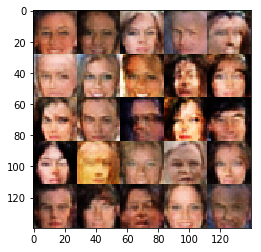

Epoch 1/1... Batch 5010... Discriminator Loss: 1.1891... Generator Loss: 0.7209
Epoch 1/1... Batch 5020... Discriminator Loss: 1.2079... Generator Loss: 1.5667
Epoch 1/1... Batch 5030... Discriminator Loss: 1.0165... Generator Loss: 1.2537
Epoch 1/1... Batch 5040... Discriminator Loss: 0.9828... Generator Loss: 1.2949
Epoch 1/1... Batch 5050... Discriminator Loss: 1.1679... Generator Loss: 1.2525
Epoch 1/1... Batch 5060... Discriminator Loss: 1.1215... Generator Loss: 0.9010
Epoch 1/1... Batch 5070... Discriminator Loss: 0.9738... Generator Loss: 1.2408
Epoch 1/1... Batch 5080... Discriminator Loss: 0.9638... Generator Loss: 1.2021
Epoch 1/1... Batch 5090... Discriminator Loss: 1.2806... Generator Loss: 0.6804
Epoch 1/1... Batch 5100... Discriminator Loss: 1.2117... Generator Loss: 0.7831


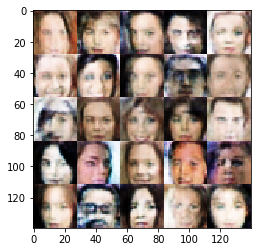

Epoch 1/1... Batch 5110... Discriminator Loss: 1.1214... Generator Loss: 1.0146
Epoch 1/1... Batch 5120... Discriminator Loss: 1.2278... Generator Loss: 0.7313
Epoch 1/1... Batch 5130... Discriminator Loss: 1.1543... Generator Loss: 0.7710
Epoch 1/1... Batch 5140... Discriminator Loss: 1.0594... Generator Loss: 1.1085
Epoch 1/1... Batch 5150... Discriminator Loss: 1.1408... Generator Loss: 0.8013
Epoch 1/1... Batch 5160... Discriminator Loss: 0.9372... Generator Loss: 1.3404
Epoch 1/1... Batch 5170... Discriminator Loss: 0.9290... Generator Loss: 1.0101
Epoch 1/1... Batch 5180... Discriminator Loss: 1.0249... Generator Loss: 0.9273
Epoch 1/1... Batch 5190... Discriminator Loss: 1.2370... Generator Loss: 0.7698
Epoch 1/1... Batch 5200... Discriminator Loss: 1.1526... Generator Loss: 1.0760


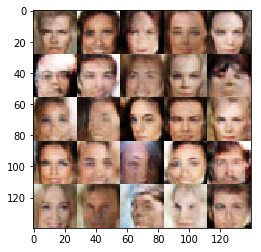

Epoch 1/1... Batch 5210... Discriminator Loss: 1.1035... Generator Loss: 1.0478
Epoch 1/1... Batch 5220... Discriminator Loss: 1.1785... Generator Loss: 0.7935
Epoch 1/1... Batch 5230... Discriminator Loss: 1.0757... Generator Loss: 1.0581
Epoch 1/1... Batch 5240... Discriminator Loss: 1.1788... Generator Loss: 1.1370
Epoch 1/1... Batch 5250... Discriminator Loss: 1.0105... Generator Loss: 1.5208
Epoch 1/1... Batch 5260... Discriminator Loss: 1.2473... Generator Loss: 0.7320
Epoch 1/1... Batch 5270... Discriminator Loss: 0.8472... Generator Loss: 1.3167
Epoch 1/1... Batch 5280... Discriminator Loss: 0.8742... Generator Loss: 1.2027
Epoch 1/1... Batch 5290... Discriminator Loss: 1.1958... Generator Loss: 0.9247
Epoch 1/1... Batch 5300... Discriminator Loss: 0.8495... Generator Loss: 1.2850


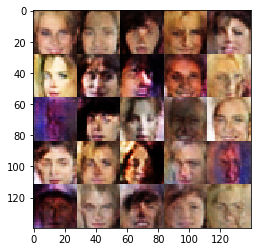

Epoch 1/1... Batch 5310... Discriminator Loss: 1.1892... Generator Loss: 1.0928
Epoch 1/1... Batch 5320... Discriminator Loss: 0.9656... Generator Loss: 0.9666
Epoch 1/1... Batch 5330... Discriminator Loss: 0.9245... Generator Loss: 1.1638
Epoch 1/1... Batch 5340... Discriminator Loss: 1.1138... Generator Loss: 0.9928
Epoch 1/1... Batch 5350... Discriminator Loss: 0.9643... Generator Loss: 1.1718
Epoch 1/1... Batch 5360... Discriminator Loss: 0.8568... Generator Loss: 1.5543
Epoch 1/1... Batch 5370... Discriminator Loss: 1.0569... Generator Loss: 0.9261
Epoch 1/1... Batch 5380... Discriminator Loss: 0.9164... Generator Loss: 1.4404
Epoch 1/1... Batch 5390... Discriminator Loss: 0.9261... Generator Loss: 1.3402
Epoch 1/1... Batch 5400... Discriminator Loss: 1.1239... Generator Loss: 0.8693


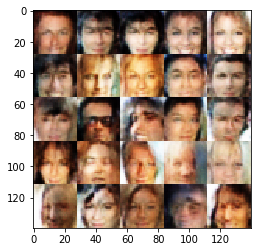

Epoch 1/1... Batch 5410... Discriminator Loss: 1.2868... Generator Loss: 1.1957
Epoch 1/1... Batch 5420... Discriminator Loss: 1.0044... Generator Loss: 1.1428
Epoch 1/1... Batch 5430... Discriminator Loss: 1.0953... Generator Loss: 0.8982
Epoch 1/1... Batch 5440... Discriminator Loss: 0.8752... Generator Loss: 1.3700
Epoch 1/1... Batch 5450... Discriminator Loss: 0.9167... Generator Loss: 1.1396
Epoch 1/1... Batch 5460... Discriminator Loss: 1.1023... Generator Loss: 0.7624
Epoch 1/1... Batch 5470... Discriminator Loss: 1.0215... Generator Loss: 1.0200
Epoch 1/1... Batch 5480... Discriminator Loss: 0.9391... Generator Loss: 1.3068
Epoch 1/1... Batch 5490... Discriminator Loss: 1.0952... Generator Loss: 0.8373
Epoch 1/1... Batch 5500... Discriminator Loss: 1.2555... Generator Loss: 0.7382


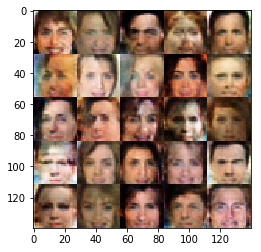

Epoch 1/1... Batch 5510... Discriminator Loss: 1.1144... Generator Loss: 0.9115
Epoch 1/1... Batch 5520... Discriminator Loss: 1.1309... Generator Loss: 0.8989
Epoch 1/1... Batch 5530... Discriminator Loss: 1.3856... Generator Loss: 0.5609
Epoch 1/1... Batch 5540... Discriminator Loss: 1.0579... Generator Loss: 0.9296
Epoch 1/1... Batch 5550... Discriminator Loss: 1.0585... Generator Loss: 0.9236
Epoch 1/1... Batch 5560... Discriminator Loss: 1.1533... Generator Loss: 0.8059
Epoch 1/1... Batch 5570... Discriminator Loss: 1.1295... Generator Loss: 0.9769
Epoch 1/1... Batch 5580... Discriminator Loss: 1.0851... Generator Loss: 0.8799
Epoch 1/1... Batch 5590... Discriminator Loss: 1.4170... Generator Loss: 0.5417
Epoch 1/1... Batch 5600... Discriminator Loss: 1.0283... Generator Loss: 0.9497


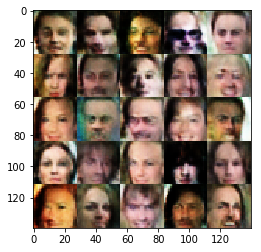

Epoch 1/1... Batch 5610... Discriminator Loss: 1.0710... Generator Loss: 0.9498
Epoch 1/1... Batch 5620... Discriminator Loss: 0.9726... Generator Loss: 1.2358
Epoch 1/1... Batch 5630... Discriminator Loss: 0.9790... Generator Loss: 1.1113
Epoch 1/1... Batch 5640... Discriminator Loss: 0.9819... Generator Loss: 0.9893
Epoch 1/1... Batch 5650... Discriminator Loss: 1.1353... Generator Loss: 0.7444
Epoch 1/1... Batch 5660... Discriminator Loss: 1.1291... Generator Loss: 0.8368
Epoch 1/1... Batch 5670... Discriminator Loss: 1.0054... Generator Loss: 1.0380
Epoch 1/1... Batch 5680... Discriminator Loss: 1.0167... Generator Loss: 1.0913
Epoch 1/1... Batch 5690... Discriminator Loss: 1.0529... Generator Loss: 1.0240
Epoch 1/1... Batch 5700... Discriminator Loss: 1.1110... Generator Loss: 1.2347


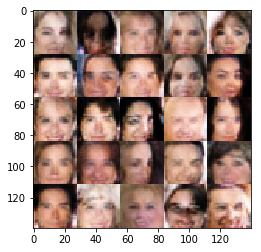

Epoch 1/1... Batch 5710... Discriminator Loss: 1.1620... Generator Loss: 1.5292
Epoch 1/1... Batch 5720... Discriminator Loss: 0.8549... Generator Loss: 1.1376
Epoch 1/1... Batch 5730... Discriminator Loss: 1.1248... Generator Loss: 0.9793
Epoch 1/1... Batch 5740... Discriminator Loss: 1.1860... Generator Loss: 0.7564
Epoch 1/1... Batch 5750... Discriminator Loss: 1.0861... Generator Loss: 0.9983
Epoch 1/1... Batch 5760... Discriminator Loss: 1.1127... Generator Loss: 0.9570
Epoch 1/1... Batch 5770... Discriminator Loss: 1.0323... Generator Loss: 0.9646
Epoch 1/1... Batch 5780... Discriminator Loss: 1.0477... Generator Loss: 0.9887
Epoch 1/1... Batch 5790... Discriminator Loss: 1.3262... Generator Loss: 0.6188
Epoch 1/1... Batch 5800... Discriminator Loss: 1.1286... Generator Loss: 0.9366


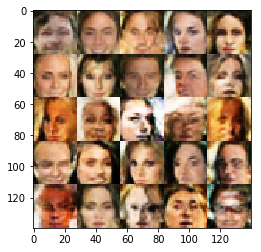

Epoch 1/1... Batch 5810... Discriminator Loss: 1.0015... Generator Loss: 1.1241
Epoch 1/1... Batch 5820... Discriminator Loss: 1.0123... Generator Loss: 1.1277
Epoch 1/1... Batch 5830... Discriminator Loss: 0.9519... Generator Loss: 1.0764
Epoch 1/1... Batch 5840... Discriminator Loss: 1.1045... Generator Loss: 0.9258
Epoch 1/1... Batch 5850... Discriminator Loss: 1.0769... Generator Loss: 0.8638
Epoch 1/1... Batch 5860... Discriminator Loss: 0.9837... Generator Loss: 1.1229
Epoch 1/1... Batch 5870... Discriminator Loss: 1.1600... Generator Loss: 0.7353
Epoch 1/1... Batch 5880... Discriminator Loss: 0.9337... Generator Loss: 1.1641
Epoch 1/1... Batch 5890... Discriminator Loss: 1.0354... Generator Loss: 0.8007
Epoch 1/1... Batch 5900... Discriminator Loss: 0.9257... Generator Loss: 1.1056


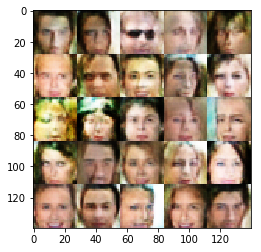

Epoch 1/1... Batch 5910... Discriminator Loss: 1.2023... Generator Loss: 0.7102
Epoch 1/1... Batch 5920... Discriminator Loss: 1.1081... Generator Loss: 0.8095
Epoch 1/1... Batch 5930... Discriminator Loss: 1.1532... Generator Loss: 0.9501
Epoch 1/1... Batch 5940... Discriminator Loss: 1.1426... Generator Loss: 0.8439
Epoch 1/1... Batch 5950... Discriminator Loss: 1.3372... Generator Loss: 0.6436
Epoch 1/1... Batch 5960... Discriminator Loss: 1.1957... Generator Loss: 0.8541
Epoch 1/1... Batch 5970... Discriminator Loss: 1.0453... Generator Loss: 1.1126
Epoch 1/1... Batch 5980... Discriminator Loss: 1.1228... Generator Loss: 0.9065
Epoch 1/1... Batch 5990... Discriminator Loss: 1.0799... Generator Loss: 0.8483
Epoch 1/1... Batch 6000... Discriminator Loss: 0.8982... Generator Loss: 1.6054


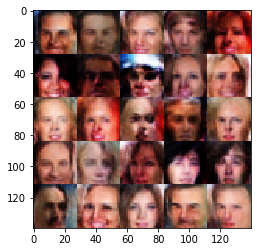

Epoch 1/1... Batch 6010... Discriminator Loss: 1.1107... Generator Loss: 0.9125
Epoch 1/1... Batch 6020... Discriminator Loss: 1.0182... Generator Loss: 1.2815
Epoch 1/1... Batch 6030... Discriminator Loss: 1.0376... Generator Loss: 0.9992
Epoch 1/1... Batch 6040... Discriminator Loss: 0.9682... Generator Loss: 1.1829
Epoch 1/1... Batch 6050... Discriminator Loss: 1.2969... Generator Loss: 0.6844
Epoch 1/1... Batch 6060... Discriminator Loss: 0.9386... Generator Loss: 1.2400
Epoch 1/1... Batch 6070... Discriminator Loss: 0.9807... Generator Loss: 1.4936
Epoch 1/1... Batch 6080... Discriminator Loss: 1.0954... Generator Loss: 0.8250
Epoch 1/1... Batch 6090... Discriminator Loss: 1.0418... Generator Loss: 0.8780
Epoch 1/1... Batch 6100... Discriminator Loss: 1.1485... Generator Loss: 1.3562


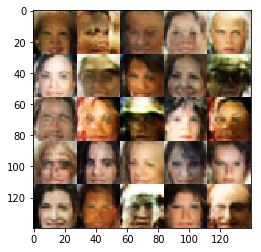

Epoch 1/1... Batch 6110... Discriminator Loss: 1.0208... Generator Loss: 1.0970
Epoch 1/1... Batch 6120... Discriminator Loss: 0.8523... Generator Loss: 1.1794
Epoch 1/1... Batch 6130... Discriminator Loss: 1.1938... Generator Loss: 0.8465
Epoch 1/1... Batch 6140... Discriminator Loss: 1.1414... Generator Loss: 0.7014
Epoch 1/1... Batch 6150... Discriminator Loss: 1.1993... Generator Loss: 0.7989
Epoch 1/1... Batch 6160... Discriminator Loss: 1.0010... Generator Loss: 1.0484
Epoch 1/1... Batch 6170... Discriminator Loss: 0.9696... Generator Loss: 1.0270
Epoch 1/1... Batch 6180... Discriminator Loss: 0.9132... Generator Loss: 1.1599
Epoch 1/1... Batch 6190... Discriminator Loss: 1.1801... Generator Loss: 0.9948
Epoch 1/1... Batch 6200... Discriminator Loss: 0.9860... Generator Loss: 1.1749


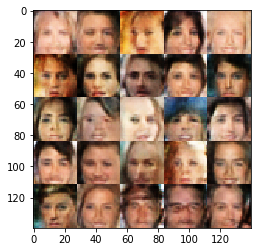

Epoch 1/1... Batch 6210... Discriminator Loss: 1.4736... Generator Loss: 0.4707
Epoch 1/1... Batch 6220... Discriminator Loss: 1.0019... Generator Loss: 1.1790
Epoch 1/1... Batch 6230... Discriminator Loss: 1.0007... Generator Loss: 0.9623
Epoch 1/1... Batch 6240... Discriminator Loss: 0.8934... Generator Loss: 1.6620
Epoch 1/1... Batch 6250... Discriminator Loss: 1.2524... Generator Loss: 0.8285
Epoch 1/1... Batch 6260... Discriminator Loss: 1.0421... Generator Loss: 0.9692
Epoch 1/1... Batch 6270... Discriminator Loss: 1.1458... Generator Loss: 0.9666
Epoch 1/1... Batch 6280... Discriminator Loss: 0.9017... Generator Loss: 1.3491
Epoch 1/1... Batch 6290... Discriminator Loss: 0.9701... Generator Loss: 1.0670
Epoch 1/1... Batch 6300... Discriminator Loss: 1.4361... Generator Loss: 0.5266


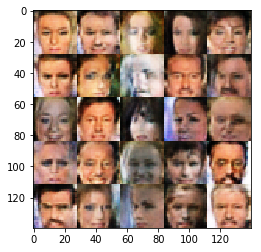

Epoch 1/1... Batch 6310... Discriminator Loss: 0.9778... Generator Loss: 1.5465
Epoch 1/1... Batch 6320... Discriminator Loss: 1.0929... Generator Loss: 1.0061
Epoch 1/1... Batch 6330... Discriminator Loss: 0.9900... Generator Loss: 1.3636


In [30]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.